# Preprocessing Data IELTS Lexical
---

***Last Run 2 Jun 2023 3:28 PM***

This notebook are used to preprocessing dataset for [IELTS Lexical Model](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Lexical). The model are required a CEFR text classfication with 6 outputs (A1, A2, B1, B2, C1, C2). [CEFR](https://www.cambridgeenglish.org/exams-and-tests/cefr/) is one of the international standards made by the university of Cambridge which is commonly used to describe language proficiency. There are 4 datasets that we will use to build [IELTS Lexical Model](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Lexical).

1. [CEFR-SP](https://github.com/yukiar/CEFR-SP).
CEFR-SP provides 17.000 English sentences annotated with CEFR levels assigned by English-education professionals.
2. [Kaggle CEFR Levelled English Texts](https://www.kaggle.com/datasets/amontgomerie/cefr-levelled-english-texts). CEFR Levelled English Texts is a dataset of about 1500 English texts labelled with Common European Framework of Reference (CEFR) levels (A1, A2, B1, B2, C1, C2) representing the difficulty of the text for reading comprehension for language learners. The content is a mixture of dialogues, descriptions, short stories, newspaper stories, and other articles (or shorter extracts from stories/articles).
3. [CERD](https://ilexir.co.uk/datasets/index.html). The Cambridge English Readability Dataset is composed of reading passages from the five main suite Cambridge English Exams (KET/A2, PET/B1, FCE/B2, CAE/C1, CPE/C2). These five exams are targeted at learners at A2-C2 levels of the Common European Framework of Reference (CEFR). The documents are harvested from all the tasks in the past reading papers for each of the exams. The Cambridge English Exams are designed for L2 learners specifically and the A2-C2 levels assigned to each reading paper can be treated as the level of reading difficulty of the documents for the L2 learners.
4. [Hugging Face](https://huggingface.co/datasets/sebastiaan/test-cefr). Test CEFR is compose text classification and text generator of english CEFR.

There are several processes that will be carried out during the data preprocessing process.

1. Install and import library.
2. Access drive from colab.
3. Collect datasets.
4. Save datasets.
5. Datasets initialization.
6. Cutting datasets.
7. Encode datasets.
8. Define length sentence.
9. Clean datasets.
10. Merge datasets.
11. Display word clouds.
12. Boxplot length sentence distribution.
13. Display length sentence distribution.
14. Display number of datasets.
15. Datasets information.
16. Save preprocessing datasets.

The output of this notebook is several CSV files that can be used to train [IELTS Lexical Model](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Lexical). The cvs files are saved in this link [OneDrive](https://telkomuniversityofficial.sharepoint.com/:f:/s/TAPurwokerto/EjfughuQWnNOuSuFtXAyodAB0EIv_8wGtQ-uY5ziZqahOw?e=yXH2lF) or [Drive](https://drive.google.com/drive/folders/1PhhJPPDZzMzOwBUXv861lVRGd2GeNg6p?usp=share_link).



## Install and import library ✅

Required library:

1. OS
2. Pandas
3. Numpy
4. Seaborn
5. Matplotlib
6. Datasets (Hugging Face)
7. Wordcloud



In [1]:
#@title Install library
%%capture
!pip install datasets

In [2]:
# Import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset, load_from_disk
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

## Access drive from colab ✅

In [4]:
# Drive access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Collect datasets ✅

### CEFR-SP 🟢

In [5]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CEFR-SP/CEFR-SP.zip" "/content/"

In [6]:
# Unzip dataset
!unzip "CEFR-SP.zip"

Archive:  CEFR-SP.zip
   creating: SCoRE/
 extracting: SCoRE/CEFR-SP_SCoRE_test.txt  
   creating: Wiki-Auto/
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_test.txt  
 extracting: README.md               
 extracting: SCoRE/CEFR-SP_SCoRE_dev.txt  
 extracting: SCoRE/CEFR-SP_SCoRE_train.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_dev.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_train.txt  


In [7]:
# Path init CEFR-SP dataset SCoRE
SCoRE_val = "SCoRE/CEFR-SP_SCoRE_dev.txt"
SCoRE_test = "SCoRE/CEFR-SP_SCoRE_test.txt"
SCoRE_train = "SCoRE/CEFR-SP_SCoRE_train.txt"

In [8]:
# Path init CEFR-SP dataset WikiAuto
WikiAuto_val = "Wiki-Auto/CEFR-SP_Wikiauto_dev.txt"
WikiAuto_test = "Wiki-Auto/CEFR-SP_Wikiauto_test.txt"
WikiAuto_train = "Wiki-Auto/CEFR-SP_Wikiauto_train.txt"

### Kaggle 🟠

#### API 🟢

In [9]:
# Init csv name
kaggle_csv_name = "cefr_leveled_texts.csv"

In [10]:
# Copy Kaggle json
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Kaggle/kaggle.json" "/content/"

In [11]:
# Save Kaggle API key to colab
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
# Download dataset
!kaggle datasets download amontgomerie/cefr-levelled-english-texts

  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 94.0MB/s]


In [13]:
# Unzip dataset
!unzip "cefr-levelled-english-texts.zip"

Archive:  cefr-levelled-english-texts.zip
  inflating: cefr_leveled_texts.csv  


In [14]:
# Define path
kaggle_path = kaggle_csv_name

#### Local 🟠

In [ ]:
# Define path
kaggle_path = "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Kaggle/cefr_leveled_texts.csv"

### CERD 🟢

In [15]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CERD/Readability_dataset_clean.zip" "/content/"

In [16]:
# Unzip data
!unzip "Readability_dataset_clean.zip"

Archive:  Readability_dataset_clean.zip
   creating: Readability_dataset_clean/
  inflating: __MACOSX/._Readability_dataset_clean  
  inflating: Readability_dataset_clean/.DS_Store  
  inflating: __MACOSX/Readability_dataset_clean/._.DS_Store  
   creating: Readability_dataset_clean/CAE/
  inflating: __MACOSX/Readability_dataset_clean/._CAE  
   creating: Readability_dataset_clean/PET/
  inflating: __MACOSX/Readability_dataset_clean/._PET  
   creating: Readability_dataset_clean/CPE/
  inflating: __MACOSX/Readability_dataset_clean/._CPE  
   creating: Readability_dataset_clean/FCE/
  inflating: __MACOSX/Readability_dataset_clean/._FCE  
   creating: Readability_dataset_clean/KET/
  inflating: __MACOSX/Readability_dataset_clean/._KET  
  inflating: Readability_dataset_clean/CAE/29.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._29.txt  
  inflating: Readability_dataset_clean/CAE/15.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._15.txt  
  inflating: Readability_

In [17]:
# Define path
cerd_path = "Readability_dataset_clean"

### Hugging Face 🟠

#### API 🟢

In [18]:
# Import dataset from Hugging Face
hugging_face_dataset = load_dataset("sebastiaan/test-cefr")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset test-cefr downloaded and prepared to /root/.cache/huggingface/datasets/sebastiaan___test-cefr/default/1.1.0/4ece2d47bd5959f302268b68b2fd1fc0e0b43efb0ce1e7edba8e642e8349c4c9. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
# Define dataset
hugging_face_train = hugging_face_dataset["train"]
hugging_face_test = hugging_face_dataset["test"]
hugging_face_val = hugging_face_dataset["validation"]

#### Local 🟠

In [ ]:
# Define path
hugging_face_path = "hugging_face_dataset"

In [ ]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Hugging Face/hugging_face_dataset.zip" "/content/"

In [ ]:
# Unzip data
!unzip "hugging_face_dataset.zip"

In [ ]:
# Load dataset
local_hugging_face = load_from_disk(hugging_face_path)

In [ ]:
# Define dataset
hugging_face_train = local_hugging_face["train"]
hugging_face_test = local_hugging_face["test"]
hugging_face_val = local_hugging_face["validation"]

## Save datasets (Optional) ⁉️

### Make dataset folder 🟢

In [20]:
# Make dataset dir
!mkdir Dataset

In [21]:
# Go to dataset folder
%cd Dataset

/content/Dataset


#### CEFR-SP

In [22]:
# Make CEFR-SP dir
!mkdir CEFR-SP

In [23]:
# Copy zip file
!cp -r "../CEFR-SP.zip" /content/Dataset/CEFR-SP

#### Kaggle

In [24]:
# Make Kaggle dir
!mkdir Kaggle

In [25]:
# Copy csv file
!cp -r "../cefr_leveled_texts.csv" /content/Dataset/Kaggle

#### CERD

In [26]:
# Make CERD dir
!mkdir CERD

In [27]:
# Copy zip file
!cp -r "../Readability_dataset_clean.zip" /content/Dataset/CERD

#### Hugging Face

In [28]:
# Make Hugging Face dir
!mkdir "Hugging Face"

In [29]:
# Go to Hugging Face folder
%cd "Hugging Face"

/content/Dataset/Hugging Face


In [30]:
# Save dataset to disk
hugging_face_dataset.save_to_disk("hugging_face_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/240440 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/29335 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/30225 [00:00<?, ? examples/s]

In [31]:
# Zip file
!zip -r "hugging_face_dataset.zip" "hugging_face_dataset"

  adding: hugging_face_dataset/ (stored 0%)
  adding: hugging_face_dataset/dataset_dict.json (deflated 2%)
  adding: hugging_face_dataset/validation/ (stored 0%)
  adding: hugging_face_dataset/validation/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/validation/state.json (deflated 38%)
  adding: hugging_face_dataset/validation/data-00000-of-00001.arrow (deflated 68%)
  adding: hugging_face_dataset/test/ (stored 0%)
  adding: hugging_face_dataset/test/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/test/state.json (deflated 37%)
  adding: hugging_face_dataset/test/data-00000-of-00001.arrow (deflated 68%)
  adding: hugging_face_dataset/train/ (stored 0%)
  adding: hugging_face_dataset/train/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/train/state.json (deflated 38%)
  adding: hugging_face_dataset/train/data-00000-of-00001.arrow (deflated 68%)


In [32]:
# Go back folder
%cd ..

/content/Dataset


### Zip all folder 🟢

In [33]:
# Go back folder
%cd ..

/content


In [34]:
# Zip file
!zip -r "Dataset.zip" /content/Dataset

  adding: content/Dataset/ (stored 0%)
  adding: content/Dataset/CERD/ (stored 0%)
  adding: content/Dataset/CERD/Readability_dataset_clean.zip (stored 0%)
  adding: content/Dataset/Hugging Face/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/dataset_dict.json (deflated 2%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/dataset_info.json (deflated 65%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/state.json (deflated 38%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/data-00000-of-00001.arrow (deflated 68%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/test/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/test/dataset_info.json (deflated 65%)
  adding: content/Dataset/Hugging Face/hugging_face_da

## Datasets initialization ✅

In [35]:
# Initialize columns
columns = ["Text", "Level"]

### CEFR-SP 🟠

#### Define function to use 🟢

In [36]:
# Define function to read dataset
def read_cefr_corpus(corpus_path):
    levels, sents = [], []
    lv_indices = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

    for path in corpus_path:
        with open(path) as f:
            all_texts = f.readlines()

        for line in all_texts:
            array = line.strip().split("\t")
            annotator_x = int(array[1])
            annotator_y = int(array[2])

            if abs(annotator_x - annotator_y) <= 1:
                lv = max(annotator_x, annotator_y) - 1

                levels.append(lv)
                sents.append(array[0])
                lv_indices[lv].append(len(sents) - 1)

    return np.array(levels), sents, lv_indices

In [37]:
# Define function to parsing dataset to numpy
def parsing_to_numpy(levels, sents):
    all = []

    for i in range(len(sents)):
        text = sents[i]
        level = levels[i]

        temp = []
        temp.append(text)
        temp.append(level)

        np.array(temp)
        all.append(temp)

    return np.array(all)

#### Read dataset 🟠

##### SCoRE (Optional) 🔴

In [ ]:
# Read CEFR-SP dataset SCoRE
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train])

##### Wiki-Auto (Optional) 🔴

In [ ]:
# Read CEFR-SP dataset Wiki-Auto
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([WikiAuto_train])

##### All 🟢

In [38]:
# Read all CEFR-SP dataset
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val, WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test, WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train, WikiAuto_train])

#### Parsing to numpy 🟢

In [39]:
# Parsing CEFR-SP dataset to numpy
cefr_sp_train = parsing_to_numpy(All_levels_train, All_sents_train)
cefr_sp_val = parsing_to_numpy(All_levels_val, All_sents_val)
cefr_sp_test = parsing_to_numpy(All_levels_test, All_sents_test)

#### Convert from numpy to dataframe 🟢

In [40]:
# Convert numpy to dataframe
df_cefr_sp_train = pd.DataFrame(cefr_sp_train, columns=columns)
df_cefr_sp_val = pd.DataFrame(cefr_sp_val, columns=columns)
df_cefr_sp_test = pd.DataFrame(cefr_sp_test, columns=columns)

In [41]:
# Replace value in level column
df_cefr_sp_train["Level"] = df_cefr_sp_train["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_val["Level"] = df_cefr_sp_val["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_test["Level"] = df_cefr_sp_test["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])

In [42]:
# Merging All CEFR-SP dataset 
df_cefr_sp_all = pd.concat([df_cefr_sp_train, df_cefr_sp_val, df_cefr_sp_test])

#### Display dataset 🟢

In [43]:
# Display CEFR-SP train dataset
df_cefr_sp_train.head()

Text Level
0                             Is that your bike ?    A1
1  She had a beautiful necklace around her neck .    A1
2                 I forgot to bring my umbrella .    A1
3                          The baby kept crying .    A1
4   Do you know what you 're doing this weekend ?    A1

In [44]:
# Display CEFR-SP train dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7178 non-null   object
 1   Level   7178 non-null   object
dtypes: object(2)
memory usage: 112.3+ KB


In [45]:
# Display CEFR-SP validation dataset
df_cefr_sp_val.head()

Text Level
0    Do you need something to eat ?    A1
1       I have two fish in a bowl .    A1
2        She wanted the grey coat .    A1
3  I sent my girlfriend red roses .    A1
4     She needs to use your phone .    A1

In [46]:
# Display CEFR-SP validation dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1366 non-null   object
 1   Level   1366 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [47]:
# Display CEFR-SP test dataset
df_cefr_sp_test.head()

Text Level
0                I bought both of them .    A1
1                   Can you speak Thai ?    A1
2  That dog running in circles is mine .    A1
3              Please give me the time .    A1
4                 These seats are ours .    A1

In [48]:
# Display CEFR-SP test dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1460 non-null   object
 1   Level   1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [49]:
# Display CEFR-SP all dataset
df_cefr_sp_all.head()

Text Level
0                             Is that your bike ?    A1
1  She had a beautiful necklace around her neck .    A1
2                 I forgot to bring my umbrella .    A1
3                          The baby kept crying .    A1
4   Do you know what you 're doing this weekend ?    A1

In [50]:
# Display CEFR-SP all information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10004 non-null  object
 1   Level   10004 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


### Kaggle 🟢

In [51]:
# Initialize dataset from csv
df_kaggle = pd.read_csv(kaggle_path)

In [52]:
# Rename column name
df_kaggle.rename(columns={"label":columns[1], "text":columns[0]}, inplace=True)

In [53]:
# Display Kaggle dataset
df_kaggle.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Hi!\nI've been meaning to write for ages and finally today I'm actually doing something about it. Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much. Since we last saw each other I've unpacked my bags in four different cities. This job has turned out to be more of a whirlwind than I expected, but it's all good! \nI went from London to Prague to set up a new regional office there. You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that. Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening. But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home. It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone.\nFrom there I was on another three-month mission to oversee the set-up of the office in New York. Loved, loved, loved New York! It's like being in one big TV show, as everywhere looks just a little bit familiar. I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out. It was really hard to leave for the next job, especially as I kind of met someone (!) More about Michael later ...\nSo then I was posted to LA, which felt like a whole other country compared with the East Coast. I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend. He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often. Those three months flew by and then I was off again, to Frankfurt, which is where I am now. And … so is Michael! He got a month off work and we're trying to work out how we can be in the same place at the same time for a while. We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there! The wedding's going to be at home in London in September and I hope you can come!\nAnyway, tell me all your news and I promise not to leave it so long this time!\nLots of love,\nKath   
1  ﻿It was not so much how hard people found the chal

In [54]:
# Display Kaggle dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1494 non-null   object
 1   Level   1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


### CERD 🟢

#### Define function and variable to use 🟢

In [55]:
# Define function to parsing dataset to numpy
def parse_files_to_numpy(sub_dirs, parent_dir):
    dataset = np.empty((0,2))
    char_remov = ["\t", "\n", "..", "...", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            with open(file_name.path) as f:
                lines = f.readlines()

            for text in lines:
                for char in char_remov:
                    text = text.replace(char, "")
                
                categories = ""

                if sub_dir == "KET":
                    categories = "A2"
                elif sub_dir == "PET":
                    categories = "B1"
                elif sub_dir == "FCE":
                    categories = "B2"
                elif sub_dir == "CAE":
                    categories = "C1"
                else:
                    categories = "C2"

                new_data = np.hstack([text, categories])
                dataset = np.vstack([dataset, new_data])

        print("Extracted features from %s, done" % (sub_dir))
        
    return np.array(dataset)

In [56]:
# Define CERD dataset path
cerd_subdirectories = os.listdir(cerd_path)
cerd_subdirectories.sort()
cerd_subdirectories.remove(".DS_Store")

print("CERD Subdirs:", cerd_subdirectories)

CERD Subdirs: ['CAE', 'CPE', 'FCE', 'KET', 'PET']


#### Parsing dataset 🟢

In [57]:
# Parsing dataset
cerd_numpy = parse_files_to_numpy(cerd_subdirectories, cerd_path)

Actual File Name:  Readability_dataset_clean/CAE/55.txt
Actual File Name:  Readability_dataset_clean/CAE/49.txt
Actual File Name:  Readability_dataset_clean/CAE/7.txt
Actual File Name:  Readability_dataset_clean/CAE/23.txt
Actual File Name:  Readability_dataset_clean/CAE/39.txt
Actual File Name:  Readability_dataset_clean/CAE/34.txt
Actual File Name:  Readability_dataset_clean/CAE/42.txt
Actual File Name:  Readability_dataset_clean/CAE/61.txt
Actual File Name:  Readability_dataset_clean/CAE/33.txt
Actual File Name:  Readability_dataset_clean/CAE/44.txt
Actual File Name:  Readability_dataset_clean/CAE/62.txt
Actual File Name:  Readability_dataset_clean/CAE/10.txt
Actual File Name:  Readability_dataset_clean/CAE/11.txt
Actual File Name:  Readability_dataset_clean/CAE/26.txt
Actual File Name:  Readability_dataset_clean/CAE/52.txt
Actual File Name:  Readability_dataset_clean/CAE/13.txt
Actual File Name:  Readability_dataset_clean/CAE/15.txt
Actual File Name:  Readability_dataset_clean/CAE/

#### Convert from numpy to dataframe 🟢

In [58]:
# Convert numpy to dataframe
df_cerd = pd.DataFrame(cerd_numpy, columns=columns)

#### Display dataset 🟢

In [59]:
# Display CERD dataset
df_cerd.head()

Text  \
0                                                                                                                                                                                                                                                                            Many of us listen to the radio when we get up in the morning and most of us also require some external means to persuade us to get out of bed. Thus we have the clock radio. But how do you pick a good one Our panel, which consisted of myself plus the inventor Tom Granger and the broadcaster Paul Bridges, tested five currently available.   
1                                                                                                                                                                                                                                                      The 'dual alarm function' that is advertised with this model does not allow you, as I first supposed, to be woken by the buzzer, snooze a while and then finally be driven out of bed. The instruction booklet advises you to use this function to set two different wake-up times, one for work days and one for weekends, but whose life is programmed to this extent   
2                                         Since this model costs more or less the same as the second model tested, the inclusion of a cassette player is quite a bargain - you can fall asleep to your own soothing tapes and wake up to a day without news. We all thought the quality of the radio excellent, too - if only the whole thing was smaller. It's as big as a rugby ball. Paul Bridges said, 'Any clock radio I buy has to leave enough space on the bedside table for my keys, wallet, glasses and telephone. Anyway, I'm completely paranoid and always book a wake-up call in case the alarm doesn't go off.'   
3  This model was voted best in the beauty stakes and overall winner. Paul Bridges declared himself 'in love with it', although the clock on the one he tested 'kept getting stuck at 16.00'. I was fascinated by the digital display, with its classy grey numbers on a gentle green background. The wide snooze bar means you can tap it on the edge with your eyes shut. Unfortunately, the smooth undulations and tactile buttons, like pebbles on the beach, encouraged me to run my fingers over them as if they were keys on a piano, which proved my undoing when I finally looked at the SO-page instruction booklet.   
4                                                                                                                                                                                                                                                                                        The clock has a self-power back-up so you don't have to reset it if someone unceremoniously pulls the plug out in order to use a hairdryer or the vacuum cleaner; this met with unanimous approval. However, we all found it a technical feat to set up - though completing the learning curve made us feel 'cool' and sophisticated.   

  Level  
0    C1  
1    C1  
2    C1  
3    C1  
4    C1

In [60]:
# Display CERD dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2543 non-null   object
 1   Level   2543 non-null   object
dtypes: object(2)
memory usage: 39.9+ KB


### Hugging Face 🟢

#### Define function and variable to use 🟢

In [61]:
# Define variabel
texts_hugging_face = []
labels_hugging_face = []
special_characters = '"'

In [62]:
# Define function to get data from Dataset
def parsing_from_dataset(dataset):
    if len(dataset["label"]) == 2:
        if any(c in special_characters for c in dataset["prompt"]):
            if dataset["prompt"].count(special_characters) == 2 :
                split_text = dataset["prompt"].split(special_characters)

                texts_hugging_face.append(split_text[1])
                labels_hugging_face.append(dataset["label"].upper())
            else:
                split_text = dataset["prompt"].split(special_characters)

                if len(split_text) == 5:
                    temp = split_text[1] + special_characters + split_text[2] + special_characters + split_text[3]

                    texts_hugging_face.append(temp)
                    labels_hugging_face.append(dataset["label"].upper())
        else:
            split_text = dataset["prompt"].split(":")

            texts_hugging_face.append(split_text[-1])
            labels_hugging_face.append(dataset["label"].upper())

#### Mapping dataset 🟢

In [63]:
# Mapping to train dataset
hugging_face_train.map(parsing_from_dataset)

Map:   0%|          | 0/240440 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 240440
})

In [64]:
# Mapping to validation dataset
hugging_face_val.map(parsing_from_dataset)

Map:   0%|          | 0/30225 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 30225
})

In [65]:
# Mapping to test dataset
hugging_face_test.map(parsing_from_dataset)

Map:   0%|          | 0/29335 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 29335
})

#### Convert to dataframe 🟢

In [66]:
# Convert to dataframe
df_hugging_face = pd.DataFrame({columns[0]:texts_hugging_face, columns[1]:labels_hugging_face})

#### Display dataset 🟢

In [67]:
# Display Hugging Face dataset
df_hugging_face.head()

Text  \
0                                    From the beginning, with only a few minor lapses, the High King of Narnia did what was right because he saw it was right.   
1                                                                                     Millington, however, was a recalcitrant 'sex worker' who never recanted.   
2  It does not, like most systems of teaching, try to make us deal with sectors of the personality that we personally experience as syntonic to our wellbeing.   
3                                                                                                                   Jessica tilted her head toward the window.   
4                                                                                                       Psychoanalysis was both repressive and antirepressive.   

  Level  
0    B2  
1    B2  
2    C1  
3    A2  
4    A2

In [68]:
# Display Hugging Face dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145999 entries, 0 to 145998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    145999 non-null  object
 1   Level   145999 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


## Cutting data ✅

### Define function and variabel to cut data 🟢

In [69]:
# Define word threshold
threshold = 800

In [70]:
# Define function remove unwanted character
def remove_char(text):
    char_remov1 = ["\t", "\n"]
    char_remov2 = ["\ufeff", "...", "   ", "..", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for char in char_remov1:
        text = text.replace(char, " ")
    for char in char_remov2:
        text = text.replace(char, "")

    return text

### Mapping to dataset 🟢

#### CEFR-SP 🟢

In [71]:
# Define data temporary CEFR-SP
split_text_cefr_sp_train = []
labels_cefr_sp_train = []
split_text_cefr_sp_val = []
labels_cefr_sp_val = []
split_text_cefr_sp_test = []
labels_cefr_sp_test = []
split_text_cefr_sp_all = []
labels_cefr_sp_all = []

In [72]:
# Define function cut data CEFR-SP train dataset
def cut_data_cefr_sp_train(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_cefr_sp_train.extend(text_temp)
    labels_cefr_sp_train.extend(label_temp)

In [73]:
# Define function cut data CEFR-SP val dataset
def cut_data_cefr_sp_val(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_cefr_sp_val.extend(text_temp)
    labels_cefr_sp_val.extend(label_temp)

In [74]:
# Define function cut data CEFR-SP test dataset
def cut_data_cefr_sp_test(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
    
    split_text_cefr_sp_test.extend(text_temp)
    labels_cefr_sp_test.extend(label_temp)

In [75]:
# Define function cut data CEFR-SP all dataset
def cut_data_cefr_sp_all(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)

    split_text_cefr_sp_all.extend(text_temp)
    labels_cefr_sp_all.extend(label_temp)

In [76]:
# Apply to CEFR-SP train dataset
df_cefr_sp_train.apply(lambda x: cut_data_cefr_sp_train(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
7173    None
7174    None
7175    None
7176    None
7177    None
Length: 7178, dtype: object

In [77]:
# Build new CEFR-SP train dataset
df_cefr_sp_train = pd.DataFrame({columns[0]:split_text_cefr_sp_train, columns[1]:labels_cefr_sp_train})

In [78]:
# Apply to CEFR-SP validation dataset
df_cefr_sp_val.apply(lambda x: cut_data_cefr_sp_val(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1361    None
1362    None
1363    None
1364    None
1365    None
Length: 1366, dtype: object

In [79]:
# Build new CEFR-SP validation dataset
df_cefr_sp_val = pd.DataFrame({columns[0]:split_text_cefr_sp_val, columns[1]:labels_cefr_sp_val})

In [80]:
# Apply to CEFR-SP test dataset
df_cefr_sp_test.apply(lambda x: cut_data_cefr_sp_test(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 1460, dtype: object

In [81]:
# Build new CEFR-SP test dataset
df_cefr_sp_test = pd.DataFrame({columns[0]:split_text_cefr_sp_test, columns[1]:labels_cefr_sp_test})

In [82]:
# Apply to CEFR-SP all dataset
df_cefr_sp_all.apply(lambda x: cut_data_cefr_sp_all(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 10004, dtype: object

In [83]:
# Build new CEFR-SP all dataset
df_cefr_sp_all = pd.DataFrame({columns[0]:split_text_cefr_sp_all, columns[1]:labels_cefr_sp_all})

#### Kaggle 🟢

In [84]:
# Define data temporary Kaggle
split_text_kaggle = []
labels_kaggle = []

In [85]:
# Define function cut data Kaggle dataset
def cut_data_kaggle(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)

    split_text_kaggle.extend(text_temp)
    labels_kaggle.extend(label_temp)

In [86]:
# Apply to Kaggle dataset
df_kaggle.apply(lambda x: cut_data_kaggle(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1489    None
1490    None
1491    None
1492    None
1493    None
Length: 1494, dtype: object

In [87]:
# Build new Kaggle dataset
df_kaggle = pd.DataFrame({columns[0]:split_text_kaggle, columns[1]:labels_kaggle})

#### CERD 🟢

In [88]:
# Define data temporary CERD
split_text_cerd = []
labels_cerd = []

In [89]:
# Define function cut data CERD dataset
def cut_data_cerd(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_cerd.extend(text_temp)
    labels_cerd.extend(label_temp)

In [90]:
# Apply to CERD dataset
df_cerd.apply(lambda x: cut_data_cerd(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2538    None
2539    None
2540    None
2541    None
2542    None
Length: 2543, dtype: object

In [91]:
# Build new CERD dataset
df_cerd = pd.DataFrame({columns[0]:split_text_cerd, columns[1]:labels_cerd})

#### Hugging Face 🟢

In [92]:
# Define data temporary Hugging Face
split_text_hugging_face = []
labels_hugging_face = []

In [93]:
# Define function cut data Hugging Face dataset
def cut_data_hugging_face(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_hugging_face.extend(text_temp)
    labels_hugging_face.extend(label_temp)

In [94]:
# Apply to Hugging Face dataset
df_hugging_face.apply(lambda x: cut_data_hugging_face(x["Text"], x["Level"]), axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
145994    None
145995    None
145996    None
145997    None
145998    None
Length: 145999, dtype: object

In [95]:
# Build new Hugging Face dataset
df_hugging_face = pd.DataFrame({columns[0]:split_text_hugging_face, columns[1]:labels_hugging_face})

## Encode data ✅

### Define function to encode data 🟢

In [96]:
# Define encode function
def encode_dataframe(df):
    df_category = pd.get_dummies(df["Level"])

    df_encode = pd.concat([df, df_category], axis=1)
    
    df_encode["Labels"] = df_encode.iloc[:, 2:].values.tolist()

    return df_encode

### Mapping to dataset 🟢

#### CEFR-SP 🟢

In [97]:
# Encode dataset CEFR-SP
df_cefr_sp_train = encode_dataframe(df_cefr_sp_train)
df_cefr_sp_val = encode_dataframe(df_cefr_sp_val)
df_cefr_sp_test = encode_dataframe(df_cefr_sp_test)
df_cefr_sp_all = encode_dataframe(df_cefr_sp_all)

#### Kaggle 🟢

In [98]:
# Encode dataset Kaggle
df_kaggle = encode_dataframe(df_kaggle)

#### CERD 🟢

In [99]:
# Add column because data is not full
df_cerd["A1"] = 0

In [100]:
# Encode dataset CERD
df_cerd = encode_dataframe(df_cerd)

#### Hugging Face 🟢

In [101]:
# Add column because data is not full
df_hugging_face["C2"] = 0

In [102]:
# Encode dataset Hugging Face
df_hugging_face = encode_dataframe(df_hugging_face)

## Define length sentence ✅

### CEFR-SP 🟢

In [103]:
# Add new column for length sentence CEFR-SP train dataset
df_cefr_sp_train["Text Count"] = df_cefr_sp_train["Text"].str.split().map(len)

In [104]:
# Max sentence length CEFR-SP train dataset
df_cefr_sp_train["Text Count"].max()

33

In [105]:
# Add new column for length sentence CEFR-SP validation dataset
df_cefr_sp_val["Text Count"] = df_cefr_sp_val["Text"].str.split().map(len)

In [106]:
# Max sentence length CEFR-SP validation dataset
df_cefr_sp_val["Text Count"].max()

31

In [107]:
# Add new column for length sentence CEFR-SP test dataset
df_cefr_sp_test["Text Count"] = df_cefr_sp_test["Text"].str.split().map(len)

In [108]:
# Max sentence length CEFR-SP test dataset
df_cefr_sp_test["Text Count"].max()

34

In [109]:
# Add new column for length sentence CEFR-SP all dataset
df_cefr_sp_all["Text Count"] = df_cefr_sp_all["Text"].str.split().map(len)

In [110]:
# Max sentence length CEFR-SP all dataset
df_cefr_sp_all["Text Count"].max()

34

### Kaggle 🟢

In [111]:
# Add new column for length sentence Kaggle dataset
df_kaggle["Text Count"] = df_kaggle["Text"].str.split().map(len)

In [112]:
# Max sentence length Kaggle dataset
df_kaggle["Text Count"].max()

210

### CERD 🟢

In [113]:
# Add new column for length sentence CERD dataset
df_cerd["Text Count"] = df_cerd["Text"].str.split().map(len)

In [114]:
# Max sentence length CERD dataset
df_cerd["Text Count"].max()

154

### Hugging Face 🟢

In [115]:
# Add new column for length sentence Hugging Face dataset
df_hugging_face["Text Count"] = df_hugging_face["Text"].str.split().map(len)

In [116]:
# Max sentence length CEFR-SP train dataset
df_hugging_face["Text Count"].max()

80

## Clean datasets ✅

### CEFR-SP 🟢

In [117]:
# Dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7178 non-null   object
 1   Level       7178 non-null   object
 2   A1          7178 non-null   uint8 
 3   A2          7178 non-null   uint8 
 4   B1          7178 non-null   uint8 
 5   B2          7178 non-null   uint8 
 6   C1          7178 non-null   uint8 
 7   C2          7178 non-null   uint8 
 8   Labels      7178 non-null   object
 9   Text Count  7178 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 266.5+ KB


In [118]:
# Delete unwanted value
df_cefr_sp_train_null = df_cefr_sp_train.loc[df_cefr_sp_train["Text"]!=""]
df_cefr_sp_train_null = df_cefr_sp_train_null.loc[df_cefr_sp_train_null["Text"]!=" "]
df_cefr_sp_train = df_cefr_sp_train_null.loc[~df_cefr_sp_train_null["Text Count"].isin([0,1,2,3])]
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7178 entries, 0 to 7177
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7178 non-null   object
 1   Level       7178 non-null   object
 2   A1          7178 non-null   uint8 
 3   A2          7178 non-null   uint8 
 4   B1          7178 non-null   uint8 
 5   B2          7178 non-null   uint8 
 6   C1          7178 non-null   uint8 
 7   C2          7178 non-null   uint8 
 8   Labels      7178 non-null   object
 9   Text Count  7178 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 322.4+ KB


In [119]:
# Dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1366 non-null   object
 1   Level       1366 non-null   object
 2   A1          1366 non-null   uint8 
 3   A2          1366 non-null   uint8 
 4   B1          1366 non-null   uint8 
 5   B2          1366 non-null   uint8 
 6   C1          1366 non-null   uint8 
 7   C2          1366 non-null   uint8 
 8   Labels      1366 non-null   object
 9   Text Count  1366 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 50.8+ KB


In [120]:
# Delete unwanted value
df_cefr_sp_val_null = df_cefr_sp_val.loc[df_cefr_sp_val["Text"]!=""]
df_cefr_sp_val_null = df_cefr_sp_val_null.loc[df_cefr_sp_val_null["Text"]!=" "]
df_cefr_sp_val = df_cefr_sp_val_null.loc[~df_cefr_sp_val_null["Text Count"].isin([0,1,2,3])]
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1366 non-null   object
 1   Level       1366 non-null   object
 2   A1          1366 non-null   uint8 
 3   A2          1366 non-null   uint8 
 4   B1          1366 non-null   uint8 
 5   B2          1366 non-null   uint8 
 6   C1          1366 non-null   uint8 
 7   C2          1366 non-null   uint8 
 8   Labels      1366 non-null   object
 9   Text Count  1366 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 61.4+ KB


In [121]:
# Dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1460 non-null   object
 1   Level       1460 non-null   object
 2   A1          1460 non-null   uint8 
 3   A2          1460 non-null   uint8 
 4   B1          1460 non-null   uint8 
 5   B2          1460 non-null   uint8 
 6   C1          1460 non-null   uint8 
 7   C2          1460 non-null   uint8 
 8   Labels      1460 non-null   object
 9   Text Count  1460 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 54.3+ KB


In [122]:
# Delete unwanted value
df_cefr_sp_test_null = df_cefr_sp_test.loc[df_cefr_sp_test["Text"]!=""]
df_cefr_sp_test_null = df_cefr_sp_test_null.loc[df_cefr_sp_test_null["Text"]!=" "]
df_cefr_sp_test = df_cefr_sp_test_null.loc[~df_cefr_sp_test_null["Text Count"].isin([0,1,2,3])]
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1460 non-null   object
 1   Level       1460 non-null   object
 2   A1          1460 non-null   uint8 
 3   A2          1460 non-null   uint8 
 4   B1          1460 non-null   uint8 
 5   B2          1460 non-null   uint8 
 6   C1          1460 non-null   uint8 
 7   C2          1460 non-null   uint8 
 8   Labels      1460 non-null   object
 9   Text Count  1460 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 65.6+ KB


In [123]:
# Dataset information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        10004 non-null  object
 1   Level       10004 non-null  object
 2   A1          10004 non-null  uint8 
 3   A2          10004 non-null  uint8 
 4   B1          10004 non-null  uint8 
 5   B2          10004 non-null  uint8 
 6   C1          10004 non-null  uint8 
 7   C2          10004 non-null  uint8 
 8   Labels      10004 non-null  object
 9   Text Count  10004 non-null  int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 371.4+ KB


In [124]:
# Delete unwanted value
df_cefr_sp_all_null = df_cefr_sp_all.loc[df_cefr_sp_all["Text"]!=""]
df_cefr_sp_all_null = df_cefr_sp_all_null.loc[df_cefr_sp_all_null["Text"]!=" "]
df_cefr_sp_all = df_cefr_sp_all_null.loc[~df_cefr_sp_all_null["Text Count"].isin([0,1,2,3])]
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 10003
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        10004 non-null  object
 1   Level       10004 non-null  object
 2   A1          10004 non-null  uint8 
 3   A2          10004 non-null  uint8 
 4   B1          10004 non-null  uint8 
 5   B2          10004 non-null  uint8 
 6   C1          10004 non-null  uint8 
 7   C2          10004 non-null  uint8 
 8   Labels      10004 non-null  object
 9   Text Count  10004 non-null  int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 449.4+ KB


### Kaggle 🟢

In [125]:
# Dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        5659 non-null   object
 1   Level       5659 non-null   object
 2   A1          5659 non-null   uint8 
 3   A2          5659 non-null   uint8 
 4   B1          5659 non-null   uint8 
 5   B2          5659 non-null   uint8 
 6   C1          5659 non-null   uint8 
 7   C2          5659 non-null   uint8 
 8   Labels      5659 non-null   object
 9   Text Count  5659 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 210.1+ KB


In [126]:
# Delete unwanted value
df_kaggle_null = df_kaggle.loc[df_kaggle["Text"]!=""]
df_kaggle_null = df_kaggle_null.loc[df_kaggle_null["Text"]!=" "]
df_kaggle = df_kaggle_null.loc[~df_kaggle_null["Text Count"].isin([0,1,2,3])]
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5653 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        5653 non-null   object
 1   Level       5653 non-null   object
 2   A1          5653 non-null   uint8 
 3   A2          5653 non-null   uint8 
 4   B1          5653 non-null   uint8 
 5   B2          5653 non-null   uint8 
 6   C1          5653 non-null   uint8 
 7   C2          5653 non-null   uint8 
 8   Labels      5653 non-null   object
 9   Text Count  5653 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 253.9+ KB


### CERD 🟢

In [127]:
# Dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        2695 non-null   object
 1   Level       2695 non-null   object
 2   A1          2695 non-null   int64 
 3   A2          2695 non-null   uint8 
 4   B1          2695 non-null   uint8 
 5   B2          2695 non-null   uint8 
 6   C1          2695 non-null   uint8 
 7   C2          2695 non-null   uint8 
 8   Labels      2695 non-null   object
 9   Text Count  2695 non-null   int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 118.6+ KB


In [128]:
# Delete unwanted value
df_cerd_null = df_cerd.loc[df_cerd["Text"]!=""]
df_cerd_null = df_cerd_null.loc[df_cerd_null["Text"]!=" "]
df_cerd = df_cerd_null.loc[~df_cerd_null["Text Count"].isin([0,1,2,3])]
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 2694
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        2694 non-null   object
 1   Level       2694 non-null   object
 2   A1          2694 non-null   int64 
 3   A2          2694 non-null   uint8 
 4   B1          2694 non-null   uint8 
 5   B2          2694 non-null   uint8 
 6   C1          2694 non-null   uint8 
 7   C2          2694 non-null   uint8 
 8   Labels      2694 non-null   object
 9   Text Count  2694 non-null   int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 139.4+ KB


### Hugging Face 🟢

In [129]:
# Dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145999 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        145999 non-null  object
 1   Level       145999 non-null  object
 2   C2          145999 non-null  int64 
 3   A1          145999 non-null  uint8 
 4   A2          145999 non-null  uint8 
 5   B1          145999 non-null  uint8 
 6   B2          145999 non-null  uint8 
 7   C1          145999 non-null  uint8 
 8   Labels      145999 non-null  object
 9   Text Count  145999 non-null  int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 6.3+ MB


In [130]:
# Delete unwanted value
df_hugging_face_null = df_hugging_face.loc[df_hugging_face["Text"]!=""]
df_hugging_face_null = df_hugging_face_null.loc[df_hugging_face_null["Text"]!=" "]
df_hugging_face = df_hugging_face_null.loc[~df_hugging_face_null["Text Count"].isin([0,1,2,3])]
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141987 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        141987 non-null  object
 1   Level       141987 non-null  object
 2   C2          141987 non-null  int64 
 3   A1          141987 non-null  uint8 
 4   A2          141987 non-null  uint8 
 5   B1          141987 non-null  uint8 
 6   B2          141987 non-null  uint8 
 7   C1          141987 non-null  uint8 
 8   Labels      141987 non-null  object
 9   Text Count  141987 non-null  int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 7.2+ MB


## Merge all datasets ✅

In [131]:
# Merging all dataset
df_all = pd.concat([df_cefr_sp_all, df_kaggle, df_cerd, df_hugging_face])

## Display word cloud ✅

### Make function 🟢

In [132]:
# Make function to display word cloud
def word_cloud_graf(cetegory):
    text = " ".join(cat for cat in df_all.loc[df_all["Level"]==cetegory]["Text"])

    # Generate word cloud
    word_cloud = WordCloud(
            width=4000,
            height=3000,
            random_state=1,
            background_color="white",
            collocations=False,
            stopwords=STOPWORDS,
            ).generate(text)

    # plot the word cloud image                      
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

    # Save data in image
    word_cloud.to_file(f"{cetegory} Word Cloud.png")

### Mapping to each category 🟢

#### A1

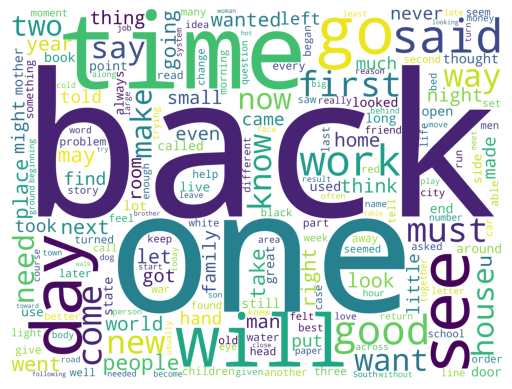

In [133]:
# Display word cloud
word_cloud_graf("A1")

#### A2

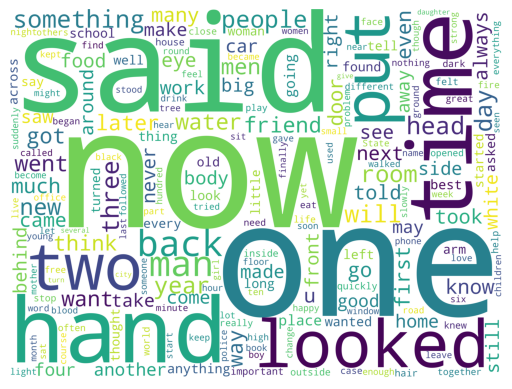

In [134]:
# Display word cloud
word_cloud_graf("A2")

#### B1

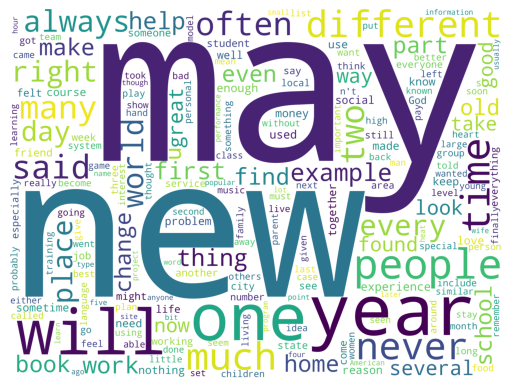

In [135]:
# Display word cloud
word_cloud_graf("B1")

#### B2

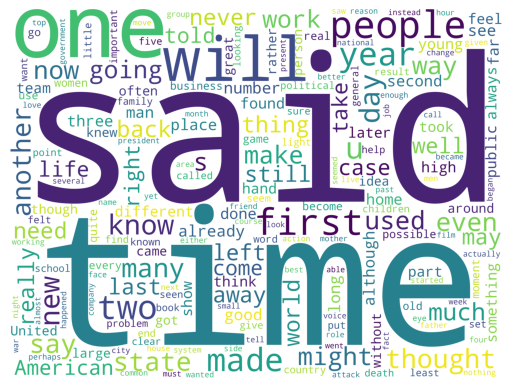

In [136]:
# Display word cloud
word_cloud_graf("B2")

#### C1

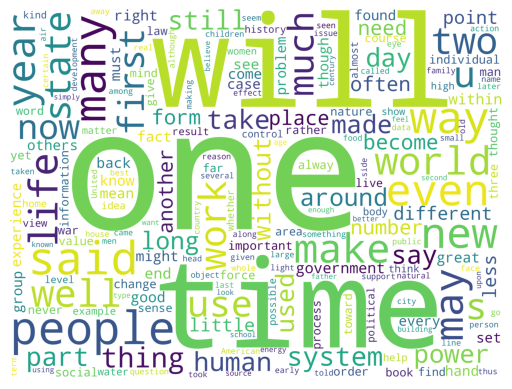

In [137]:
# Display word cloud
word_cloud_graf("C1")

#### C2

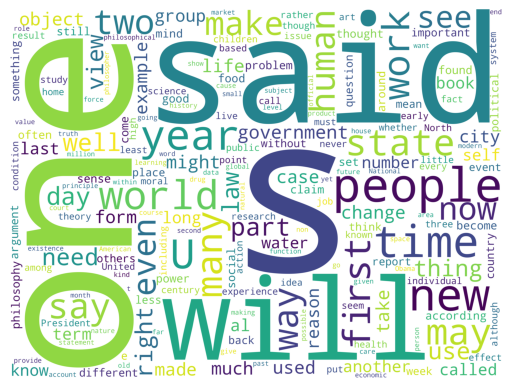

In [138]:
# Display word cloud
word_cloud_graf("C2")

## Boxplot length sentence distribution ✅

In [139]:
# Define function for display boxplot
def box_plot(df, title):
    plt_title = title
    a1 = df["Text Count"].loc[df["Level"]=="A1"].values
    a2 = df["Text Count"].loc[df["Level"]=="A2"].values
    b1 = df["Text Count"].loc[df["Level"]=="B1"].values
    b2 = df["Text Count"].loc[df["Level"]=="B2"].values
    c1 = df["Text Count"].loc[df["Level"]=="C1"].values
    c2 = df["Text Count"].loc[df["Level"]=="C2"].values
    all = [a1, a2, b1, b2, c1, c2]

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(all, labels=["A1", "A2", "B1", "B2", "C1", "C2"]) 

    plt.xlabel("Box Plot", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

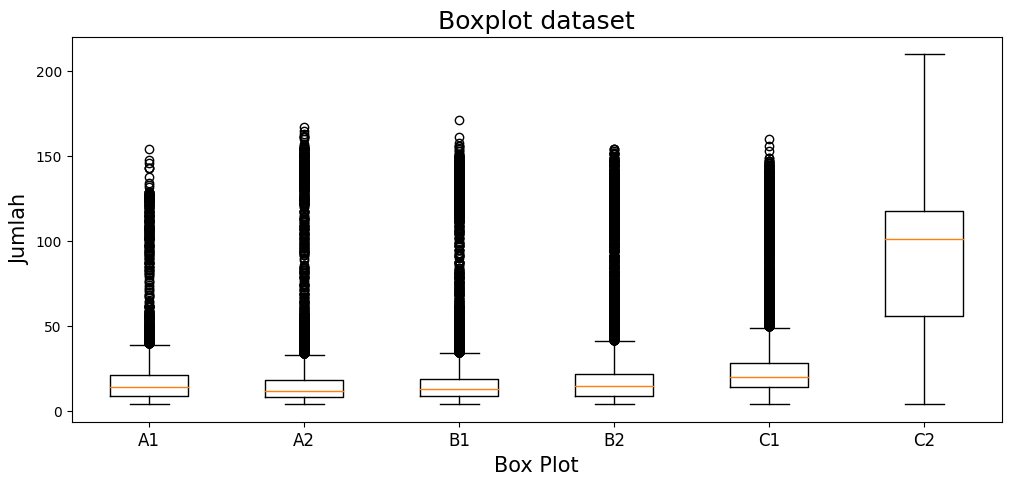

In [140]:
# Display boxplot
box_plot(df_all, "Boxplot dataset")

<Axes: title={'center': 'Text Count'}, xlabel='Level'>

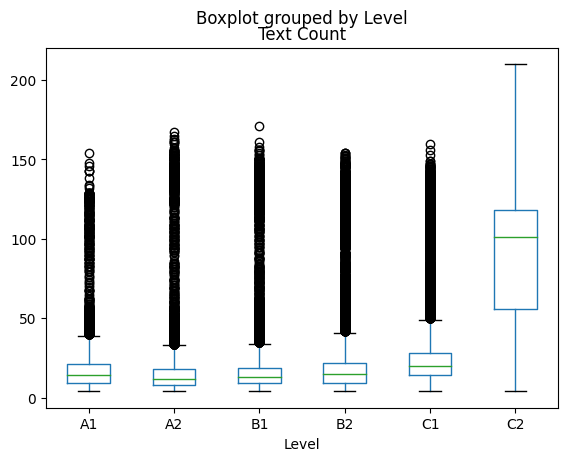

In [141]:
# Boxplot from pandas
df_all.boxplot(by="Level", column=["Text Count"], grid=False)

## Display length sentence distribution ✅

### Function to display 🟢

In [142]:
# Define function for display number of datasets
def vis_data_count(df, title):
    plt_title = title
    words_count = df["Text Count"].value_counts()
    count = words_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=count, y=words_count)

    plt.xlabel("Jumlah Kata", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

### Mapping to dataset 🟢

#### CEFR-SP 🟢

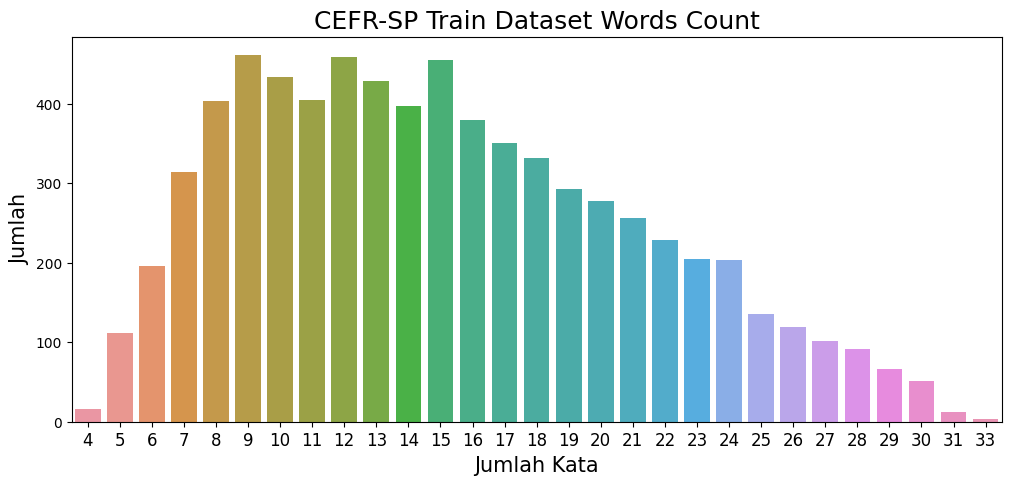

In [143]:
# Visualize CEFR-SP train dataset
vis_data_count(df_cefr_sp_train, "CEFR-SP Train Dataset Words Count")

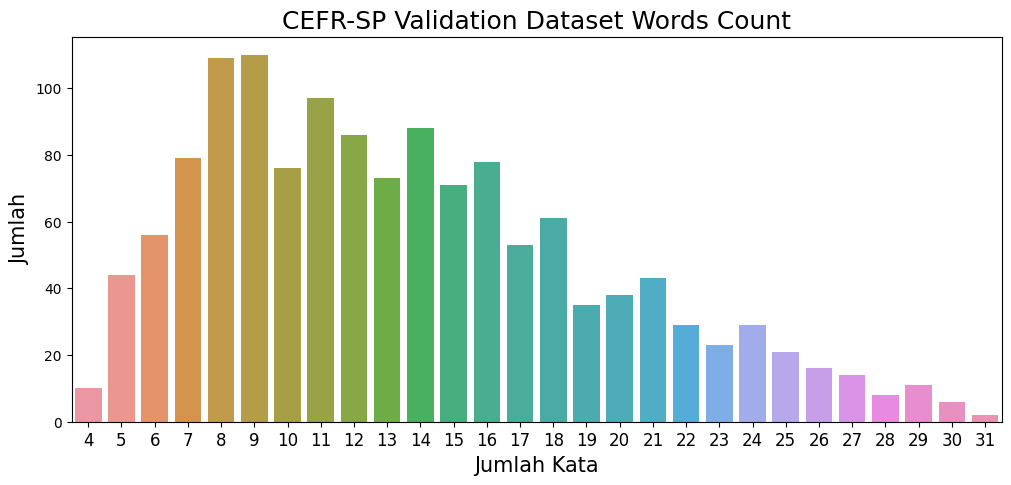

In [144]:
# Visualize CEFR-SP validation dataset
vis_data_count(df_cefr_sp_val, "CEFR-SP Validation Dataset Words Count")

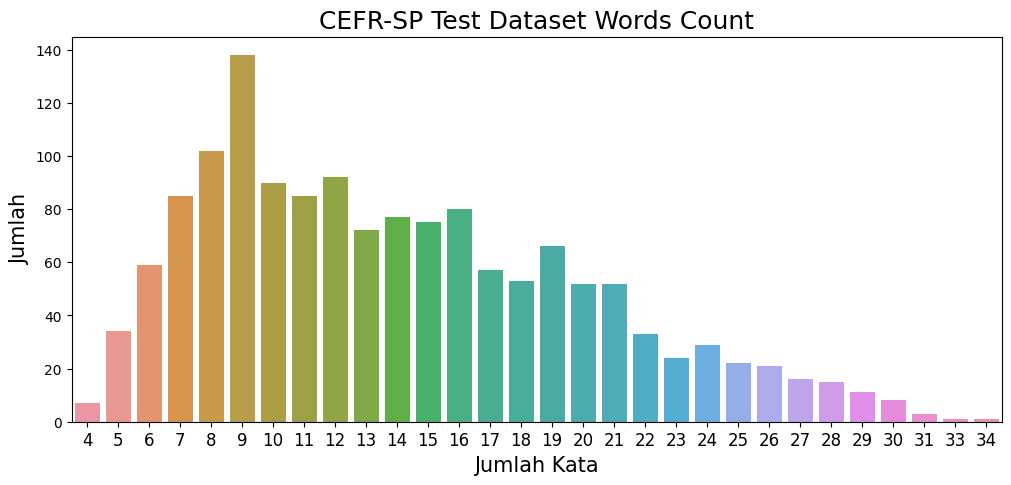

In [145]:
# Visualize CEFR-SP test dataset
vis_data_count(df_cefr_sp_test, "CEFR-SP Test Dataset Words Count")

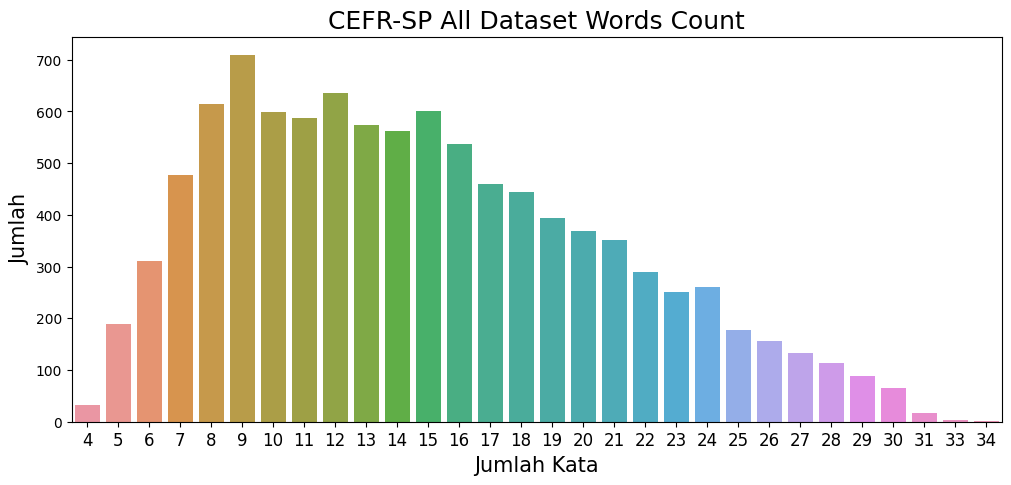

In [146]:
# Visualize CEFR-SP all dataset
vis_data_count(df_cefr_sp_all, "CEFR-SP All Dataset Words Count")

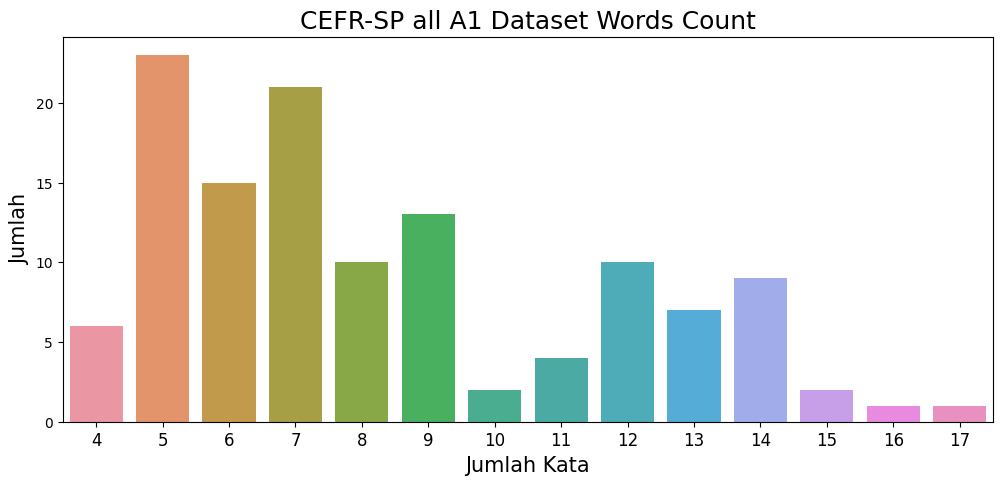

In [147]:
# Visualize CEFR-SP all A1 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="A1"], "CEFR-SP all A1 Dataset Words Count")

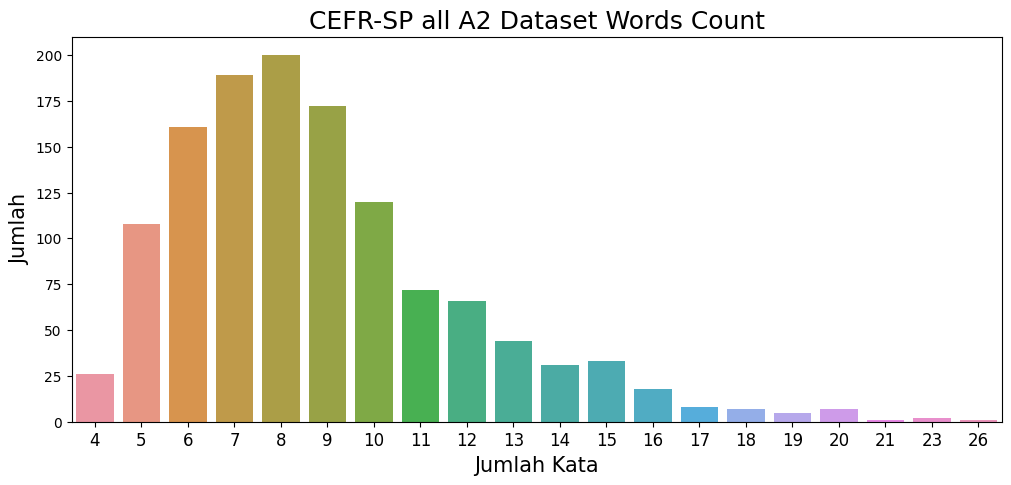

In [148]:
# Visualize CEFR-SP all A2 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="A2"], "CEFR-SP all A2 Dataset Words Count")

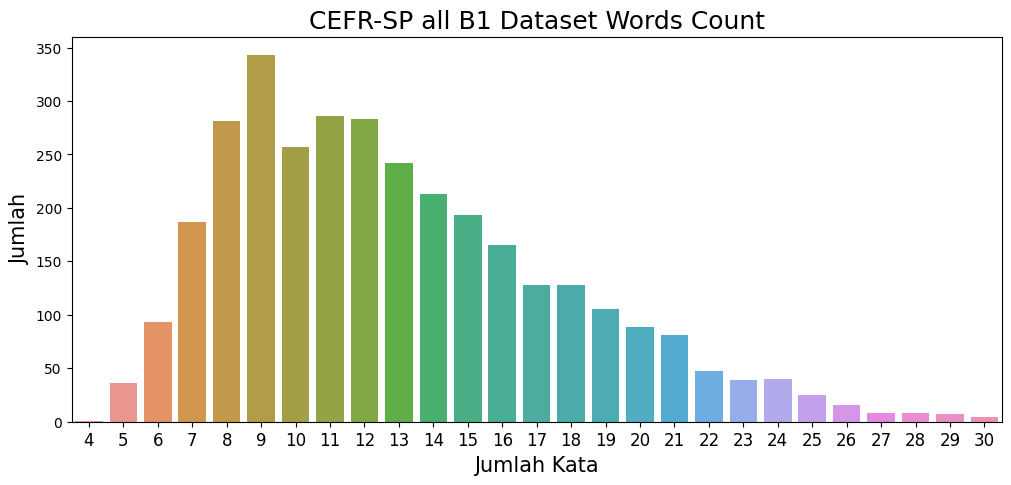

In [149]:
# Visualize CEFR-SP all B1 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="B1"], "CEFR-SP all B1 Dataset Words Count")

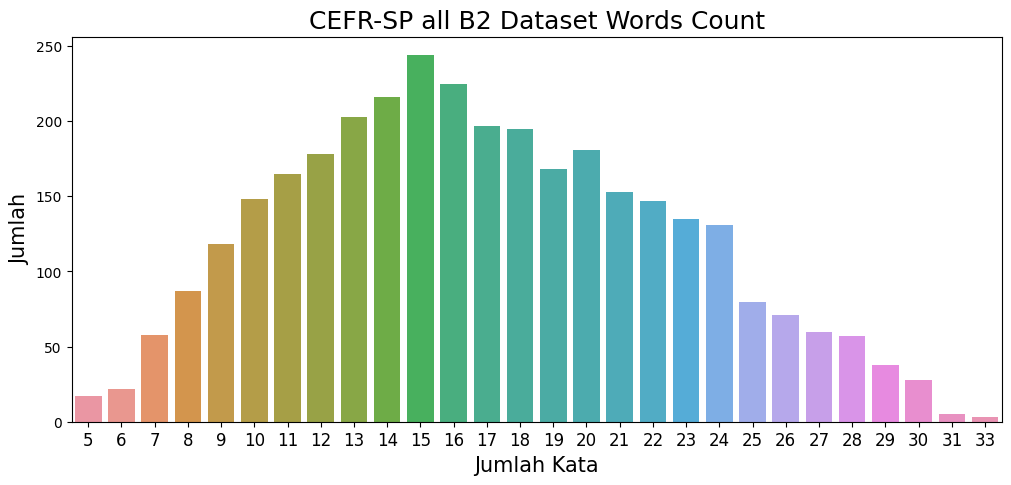

In [150]:
# Visualize CEFR-SP all B2 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="B2"], "CEFR-SP all B2 Dataset Words Count")

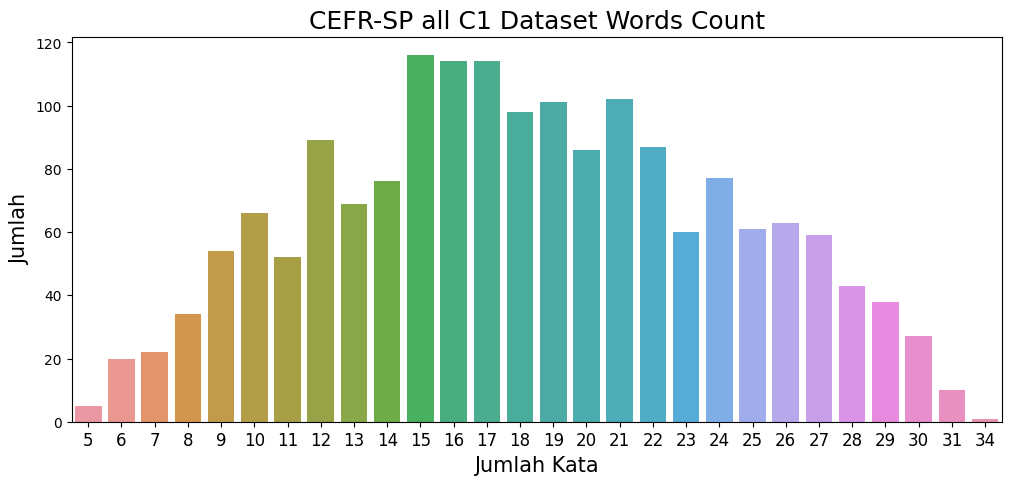

In [151]:
# Visualize CEFR-SP all C1 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="C1"], "CEFR-SP all C1 Dataset Words Count")

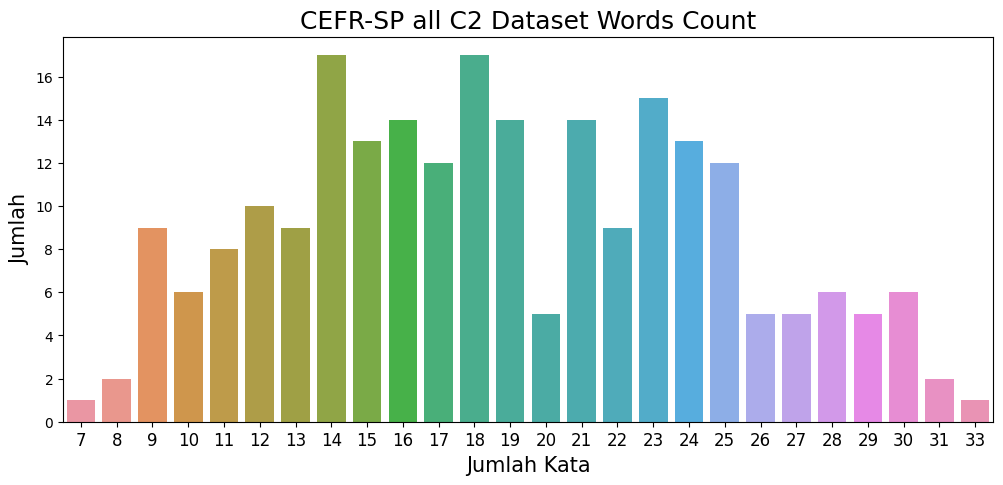

In [152]:
# Visualize CEFR-SP all C2 dataset
vis_data_count(df_cefr_sp_all.loc[df_cefr_sp_all["Level"]=="C2"], "CEFR-SP all C2 Dataset Words Count")

#### Kaggle 🟢

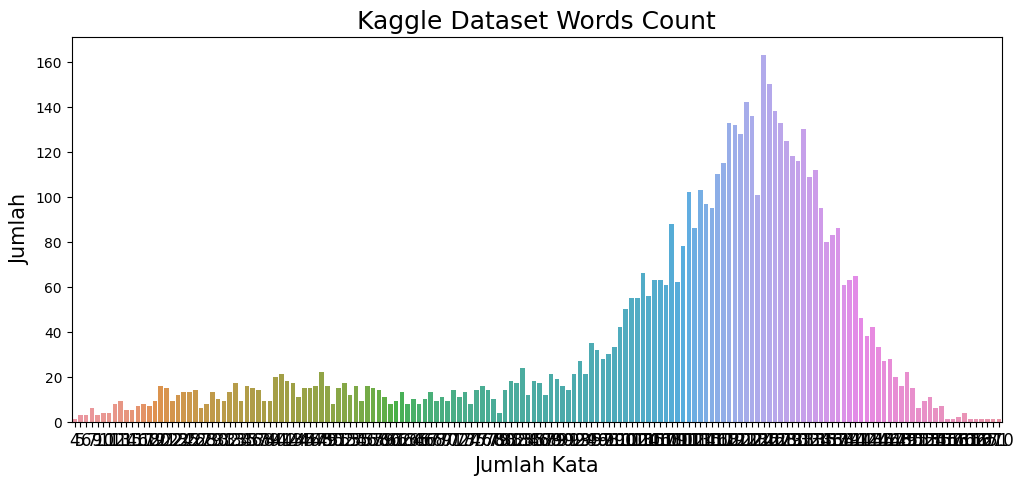

In [153]:
# Visualize Kaggle dataset
vis_data_count(df_kaggle, "Kaggle Dataset Words Count")

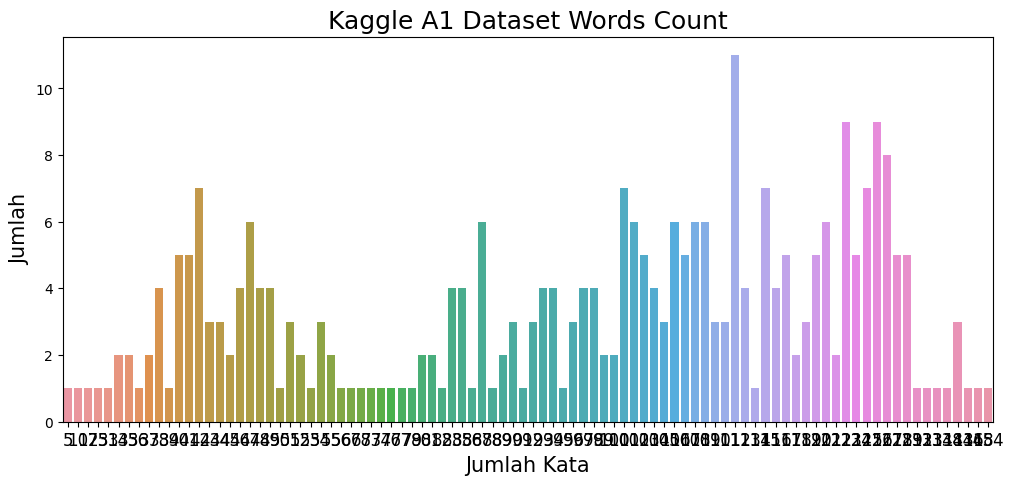

In [154]:
# Visualize Kaggle A1 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="A1"], "Kaggle A1 Dataset Words Count")

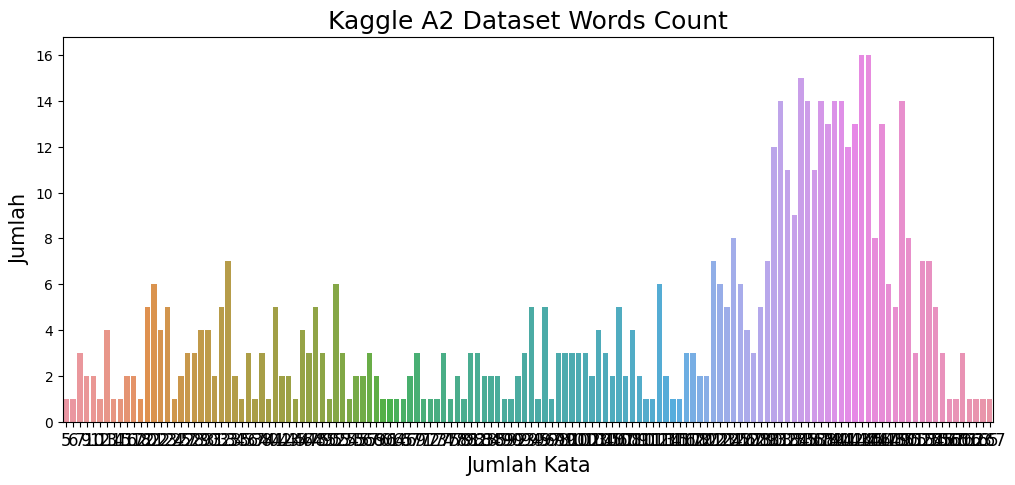

In [155]:
# Visualize Kaggle A2 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="A2"], "Kaggle A2 Dataset Words Count")

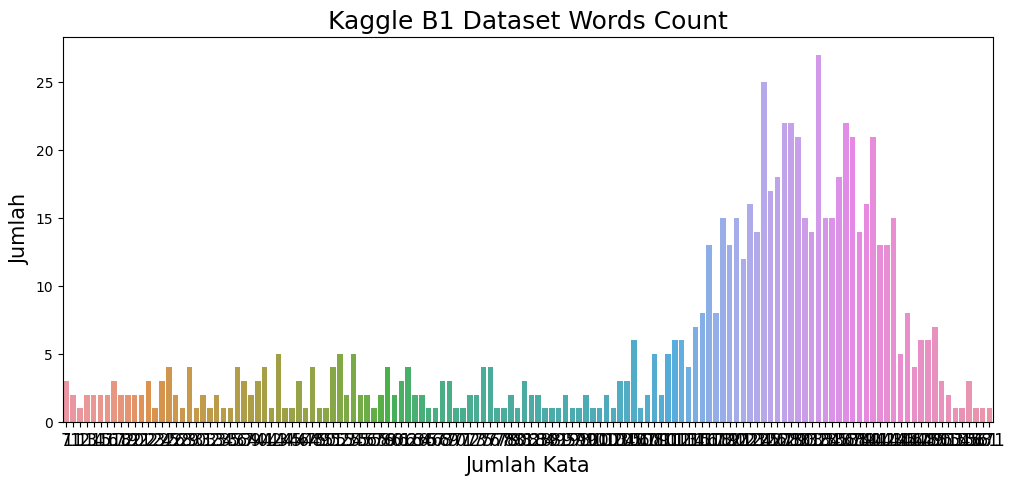

In [156]:
# Visualize Kaggle B1 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="B1"], "Kaggle B1 Dataset Words Count")

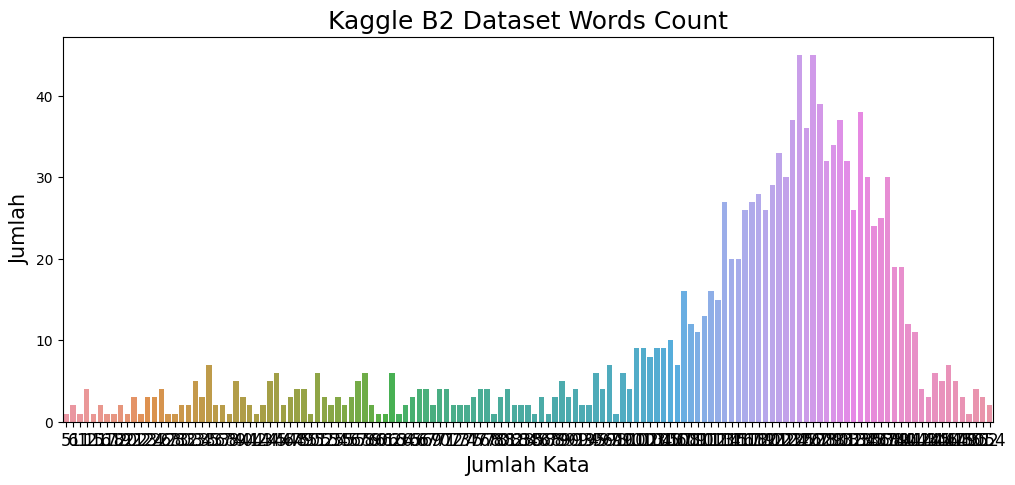

In [157]:
# Visualize Kaggle B2 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="B2"], "Kaggle B2 Dataset Words Count")

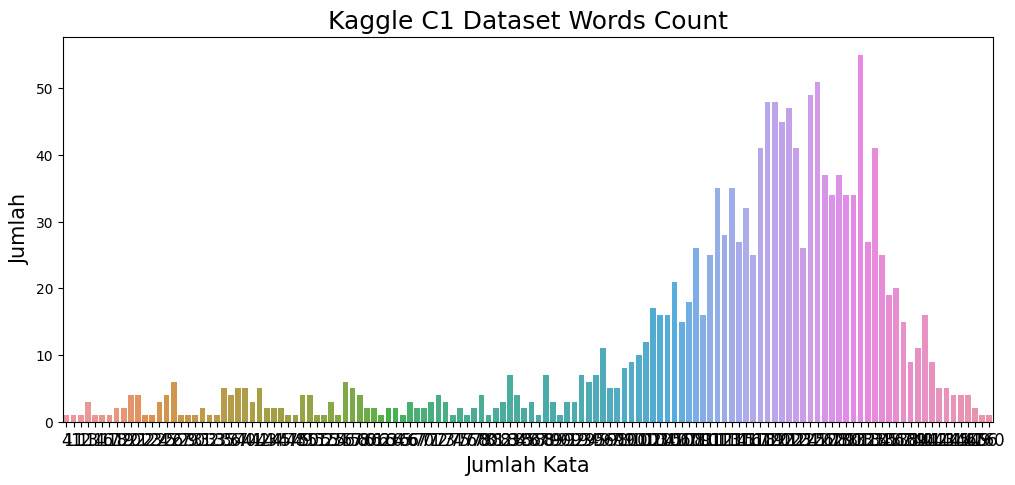

In [158]:
# Visualize Kaggle C1 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="C1"], "Kaggle C1 Dataset Words Count")

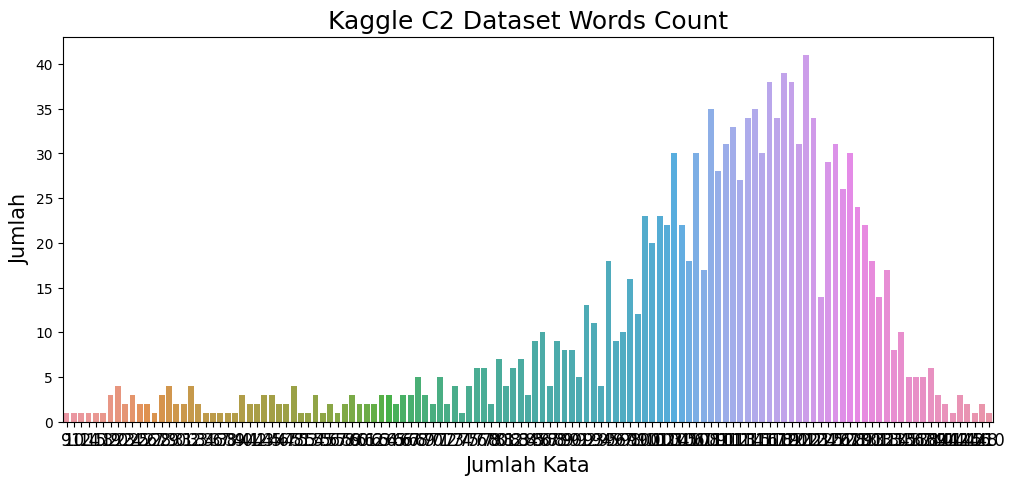

In [159]:
# Visualize Kaggle C2 dataset
vis_data_count(df_kaggle.loc[df_kaggle["Level"]=="C2"], "Kaggle C2 Dataset Words Count")

#### CERD 🟢

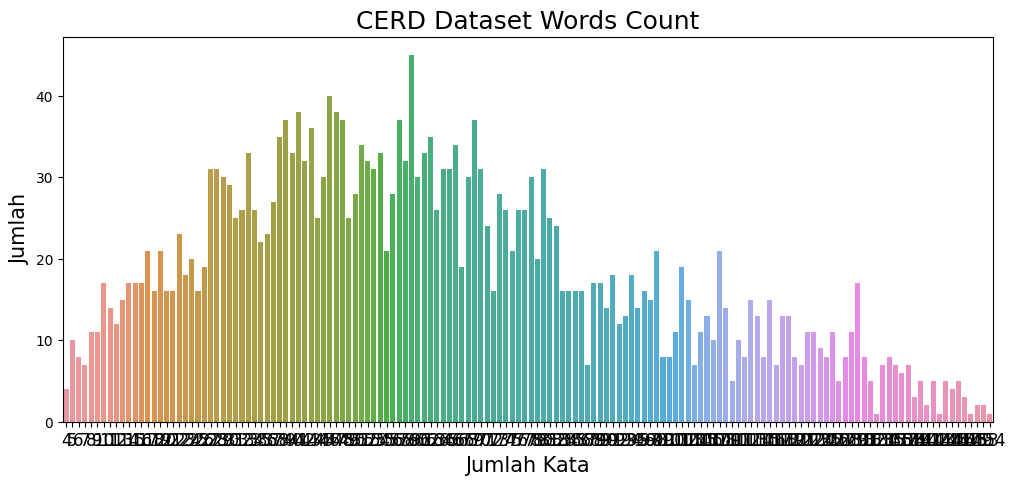

In [160]:
# Visualize CERD dataset
vis_data_count(df_cerd, "CERD Dataset Words Count")

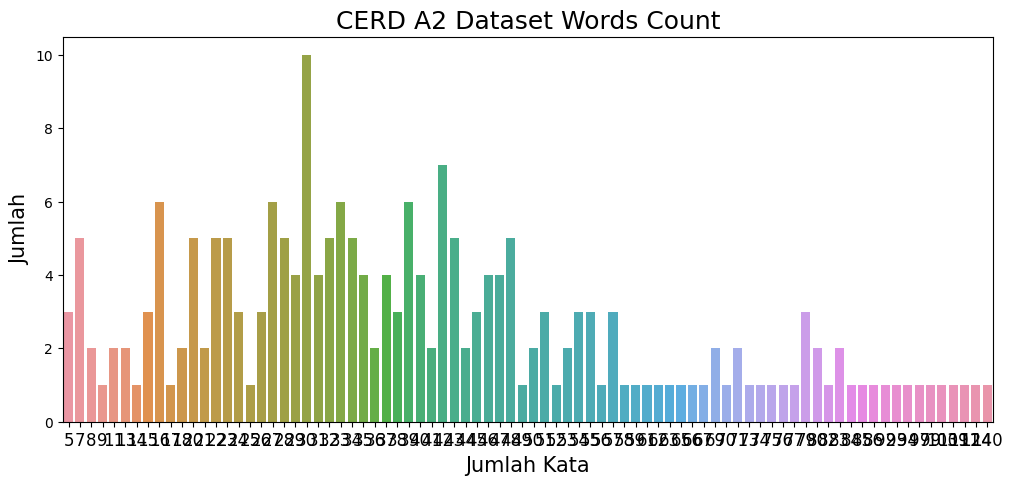

In [161]:
# Visualize CERD A2 dataset
vis_data_count(df_cerd.loc[df_cerd["Level"]=="A2"], "CERD A2 Dataset Words Count")

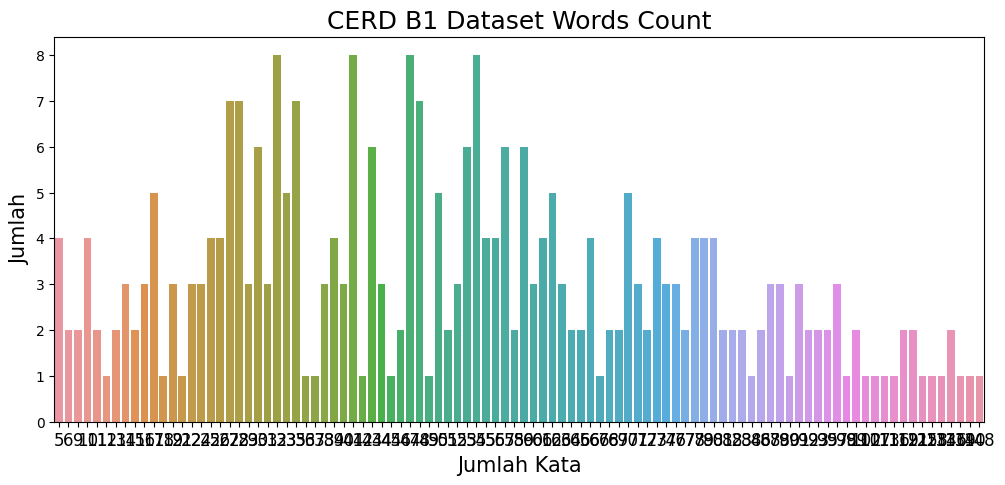

In [162]:
# Visualize CERD B1 dataset
vis_data_count(df_cerd.loc[df_cerd["Level"]=="B1"], "CERD B1 Dataset Words Count")

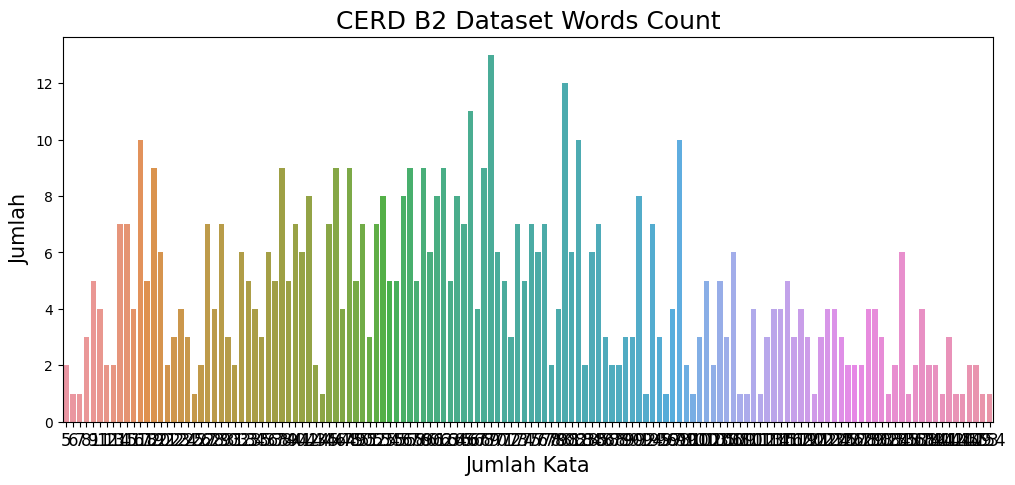

In [163]:
# Visualize CERD B2 dataset
vis_data_count(df_cerd.loc[df_cerd["Level"]=="B2"], "CERD B2 Dataset Words Count")

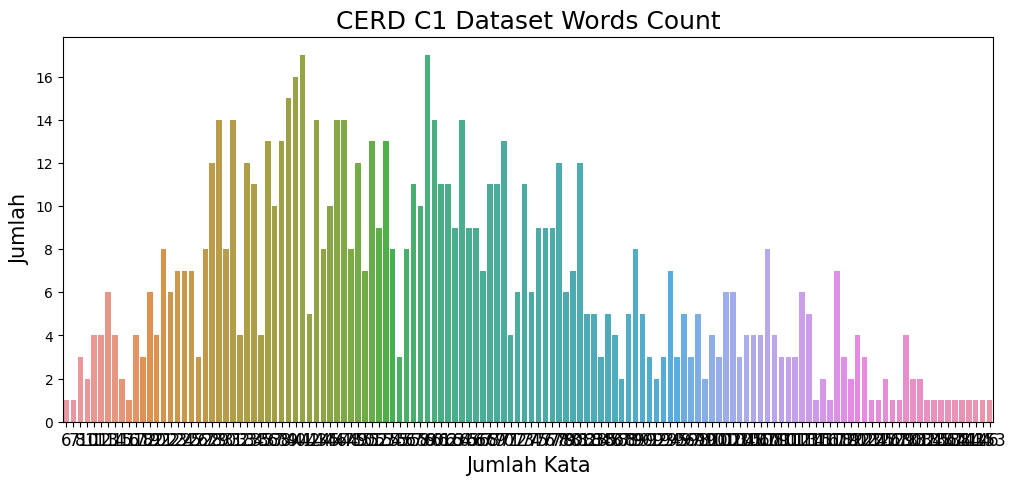

In [164]:
# Visualize CERD C1 dataset
vis_data_count(df_cerd.loc[df_cerd["Level"]=="C1"], "CERD C1 Dataset Words Count")

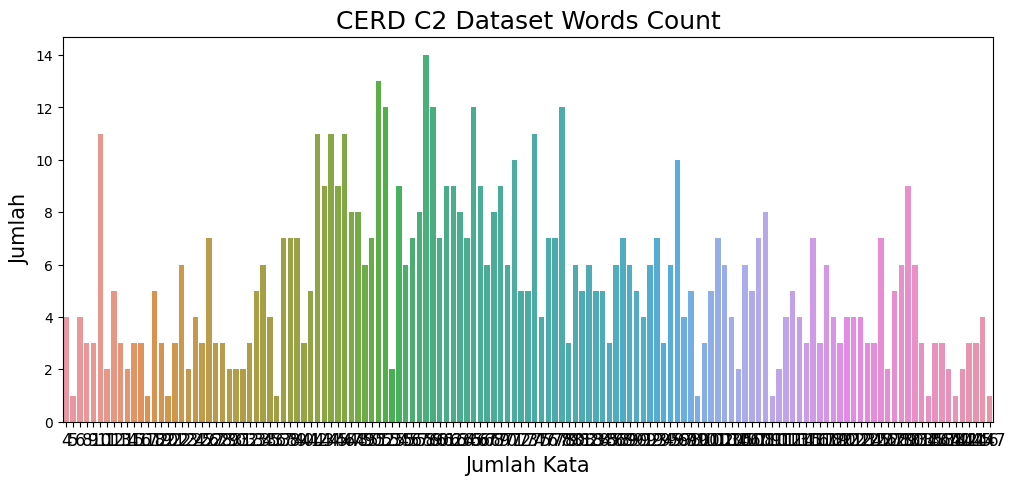

In [165]:
# Visualize CERD C2 dataset
vis_data_count(df_cerd.loc[df_cerd["Level"]=="C2"], "CERD C2 Dataset Words Count")

#### Hugging Face 🟢

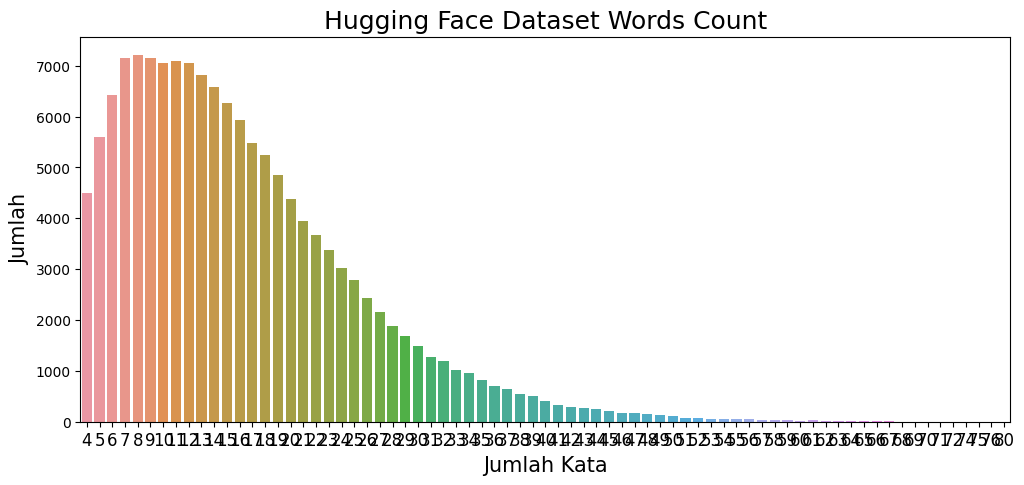

In [166]:
# Visualize Hugging Face dataset
vis_data_count(df_hugging_face, "Hugging Face Dataset Words Count")

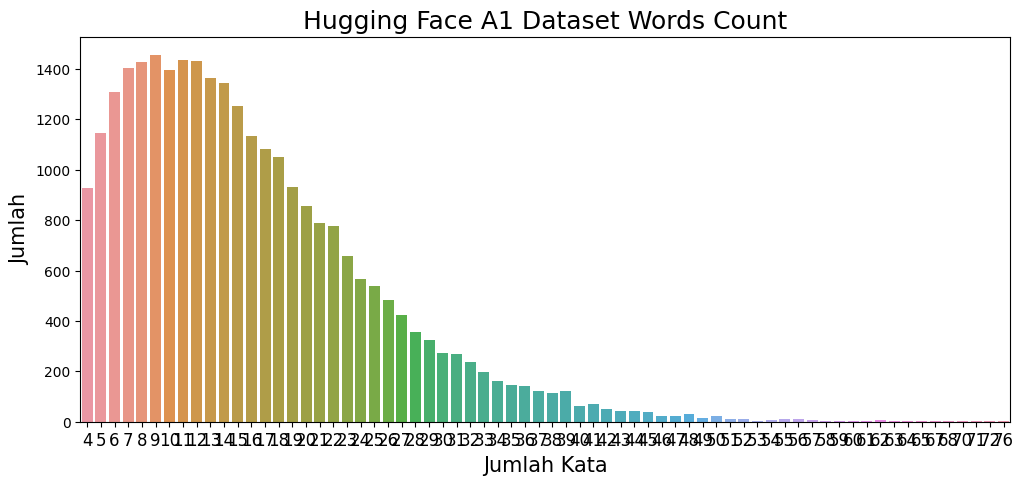

In [167]:
# Visualize Hugging Face A1 dataset
vis_data_count(df_hugging_face.loc[df_hugging_face["Level"]=="A1"], "Hugging Face A1 Dataset Words Count")

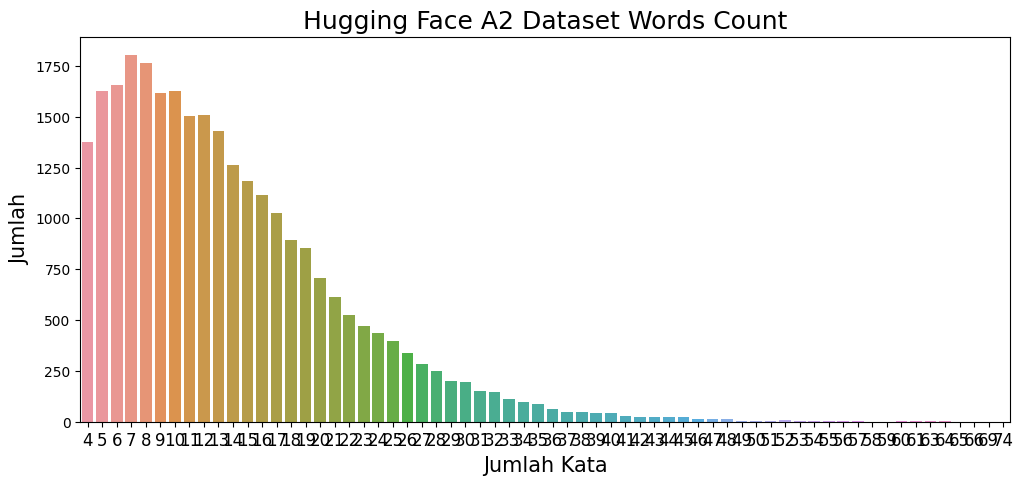

In [168]:
# Visualize Hugging Face A2 dataset
vis_data_count(df_hugging_face.loc[df_hugging_face["Level"]=="A2"], "Hugging Face A2 Dataset Words Count")

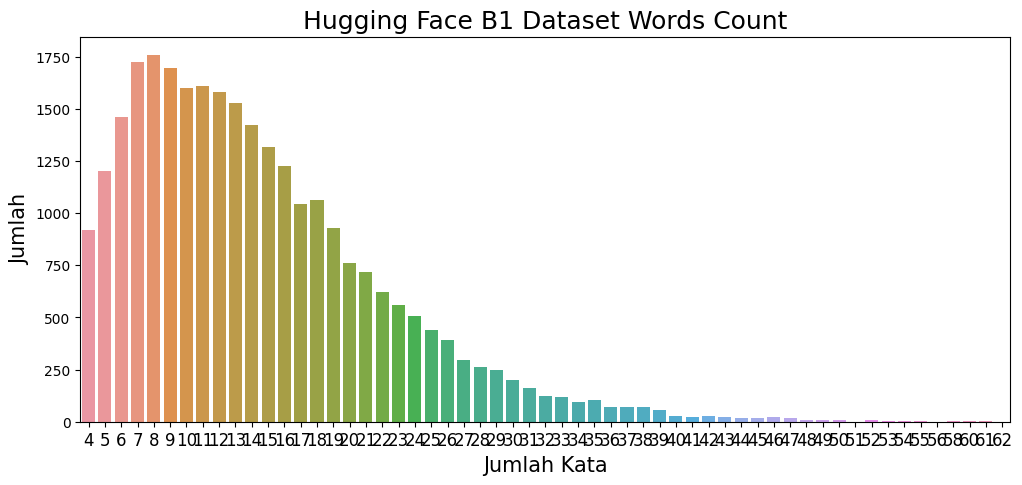

In [169]:
# Visualize Hugging Face B1 dataset
vis_data_count(df_hugging_face.loc[df_hugging_face["Level"]=="B1"], "Hugging Face B1 Dataset Words Count")

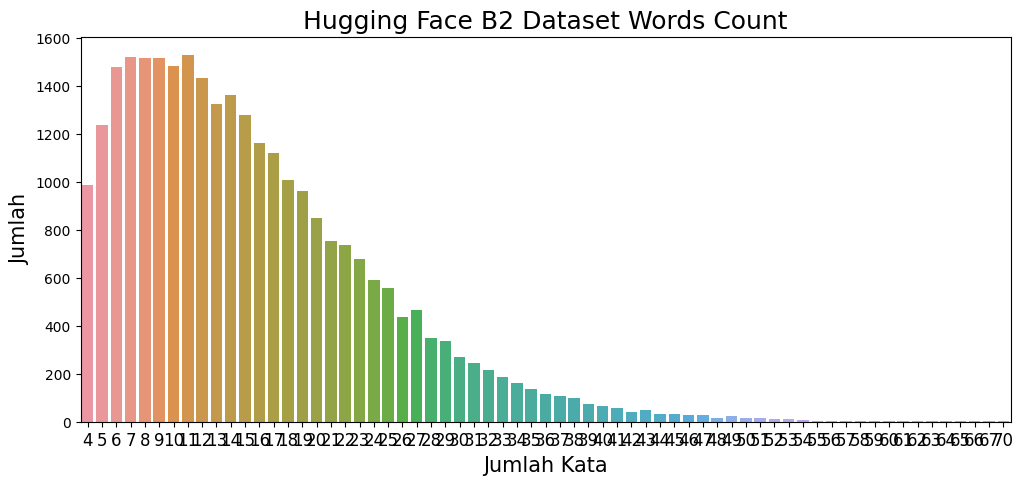

In [170]:
# Visualize Hugging Face B2 dataset
vis_data_count(df_hugging_face.loc[df_hugging_face["Level"]=="B2"], "Hugging Face B2 Dataset Words Count")

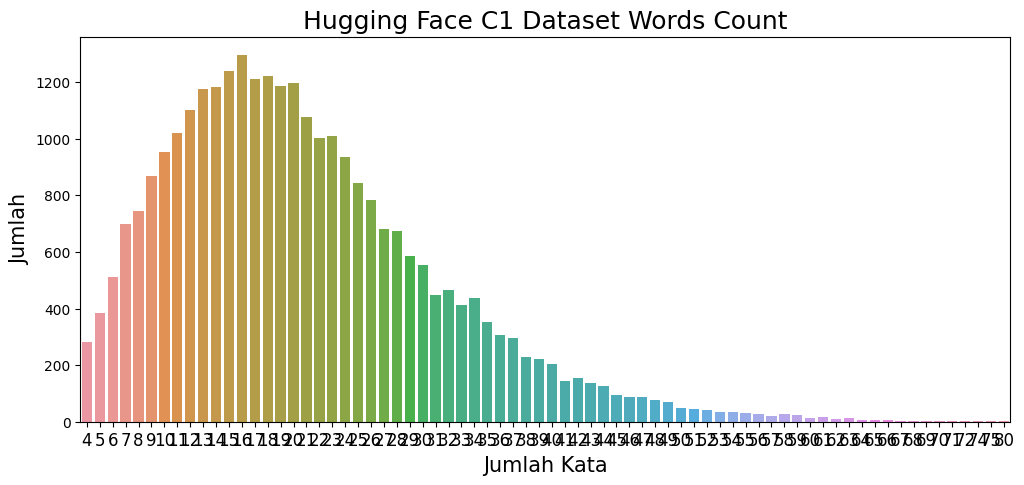

In [171]:
# Visualize Hugging Face C1 dataset
vis_data_count(df_hugging_face.loc[df_hugging_face["Level"]=="C1"], "Hugging Face C1 Dataset Words Count")

#### All 🟢

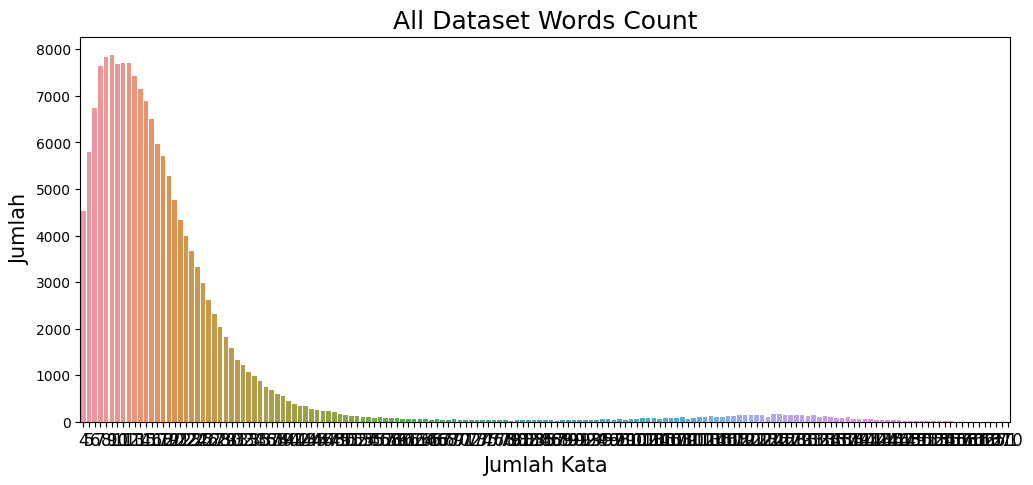

In [172]:
# Visualize all dataset
vis_data_count(df_all, "All Dataset Words Count")

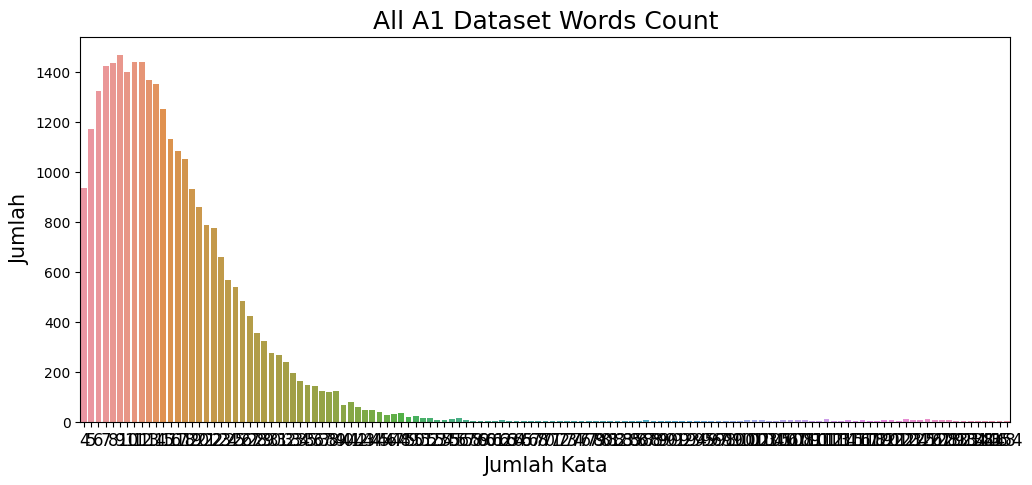

In [173]:
# Visualize all A1 dataset
vis_data_count(df_all.loc[df_all["Level"]=="A1"], "All A1 Dataset Words Count")

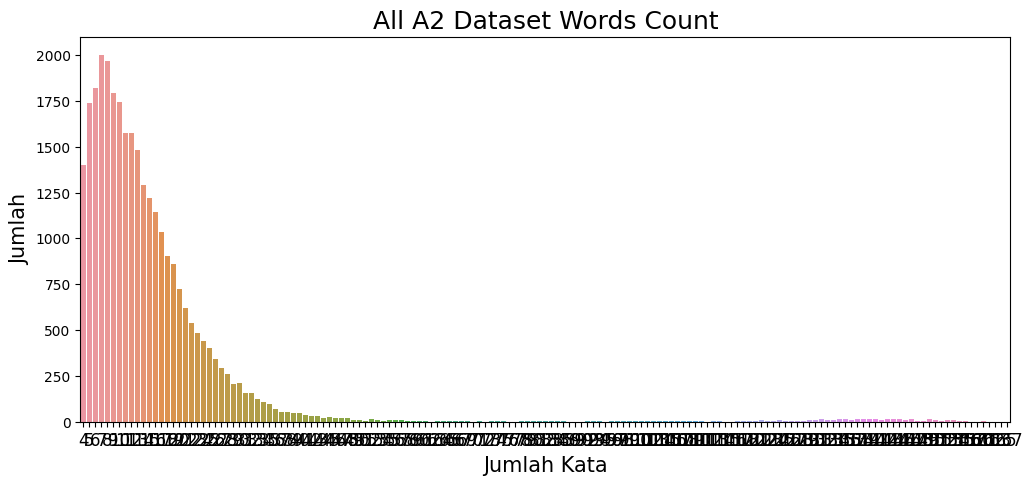

In [174]:
# Visualize all A2 dataset
vis_data_count(df_all.loc[df_all["Level"]=="A2"], "All A2 Dataset Words Count")

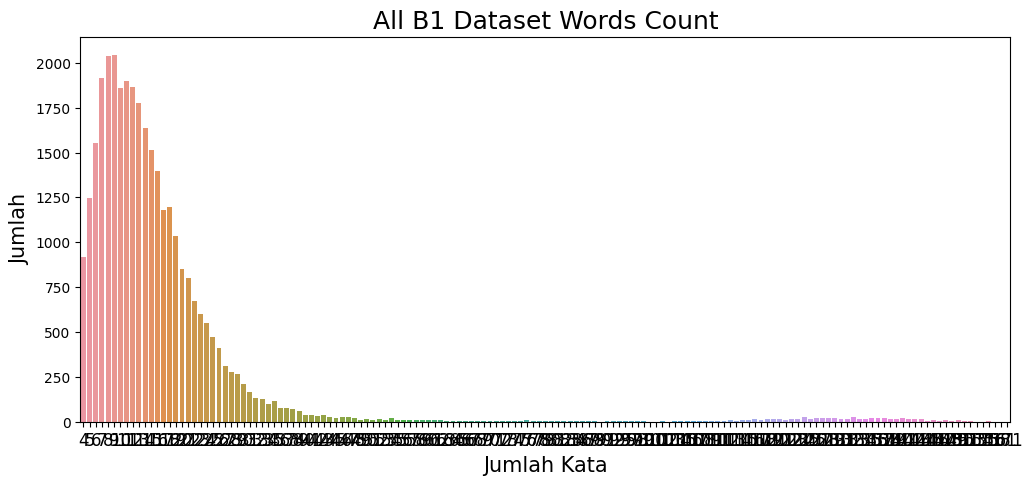

In [175]:
# Visualize all B1 dataset
vis_data_count(df_all.loc[df_all["Level"]=="B1"], "All B1 Dataset Words Count")

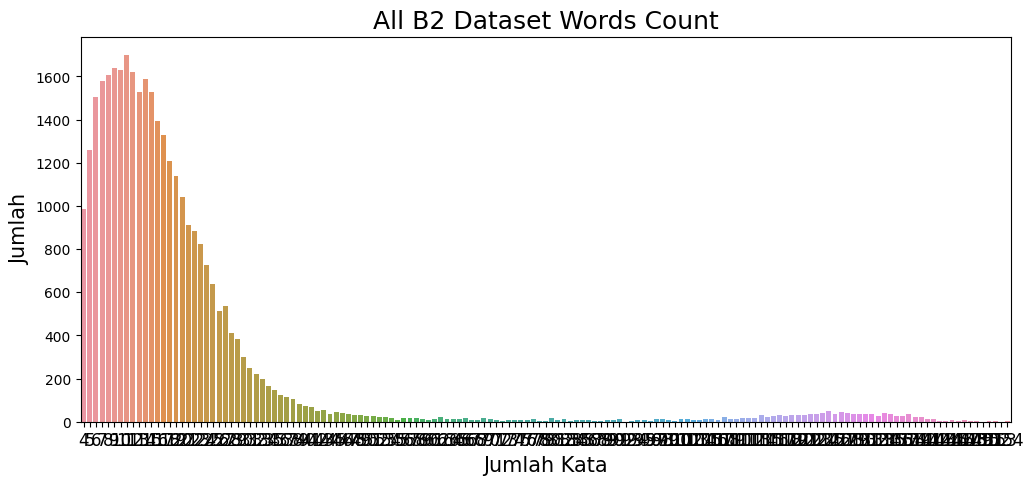

In [176]:
# Visualize all B2 dataset
vis_data_count(df_all.loc[df_all["Level"]=="B2"], "All B2 Dataset Words Count")

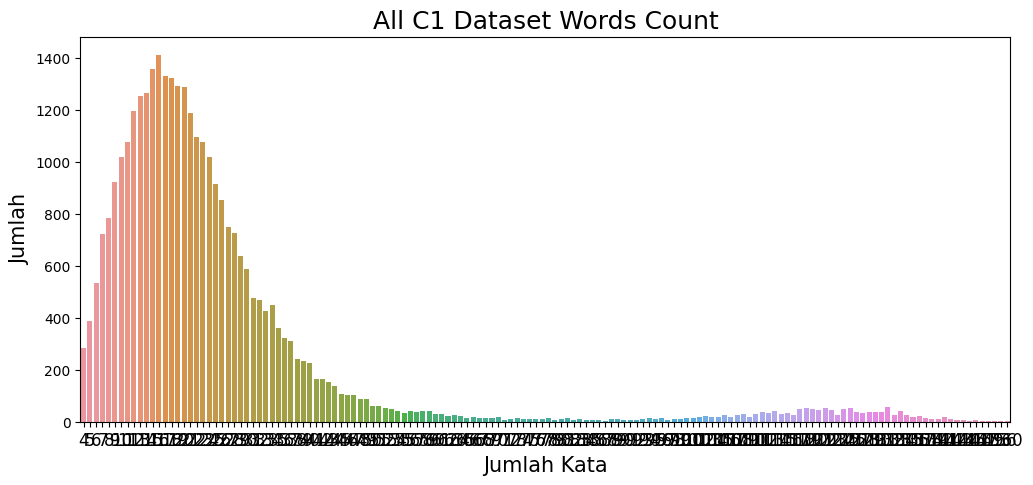

In [177]:
# Visualize all C1 dataset
vis_data_count(df_all.loc[df_all["Level"]=="C1"], "All C1 Dataset Words Count")

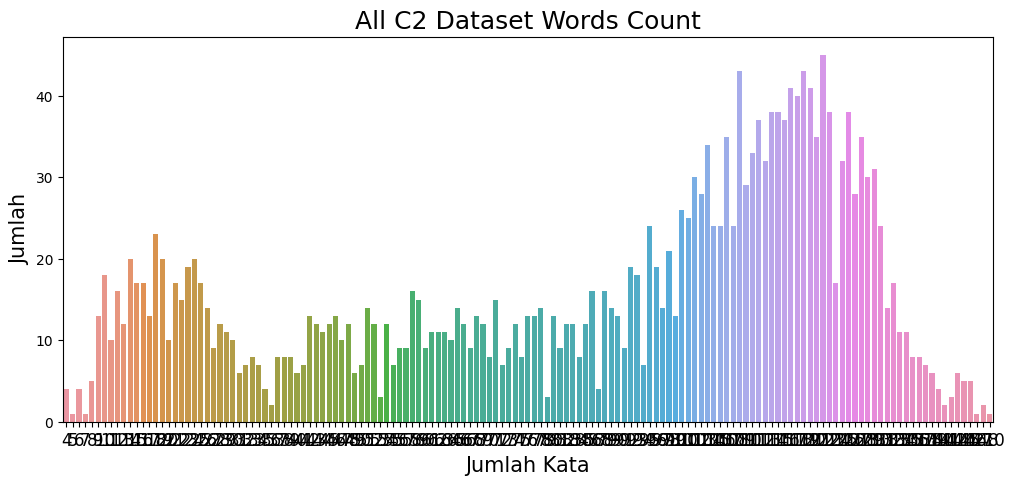

In [178]:
# Visualize all C2 dataset
vis_data_count(df_all.loc[df_all["Level"]=="C2"], "All C2 Dataset Words Count")

## Display number of datasets ✅

### Define function for display number of datasets 🟢

In [179]:
# Define function for display number of datasets
def vis_data(df, title):
    plt_title = title
    category_count = df["Level"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=categories, y=category_count )

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black" , 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0,)

### Mapping datasets 🟢

#### CEFR-SP 🟢

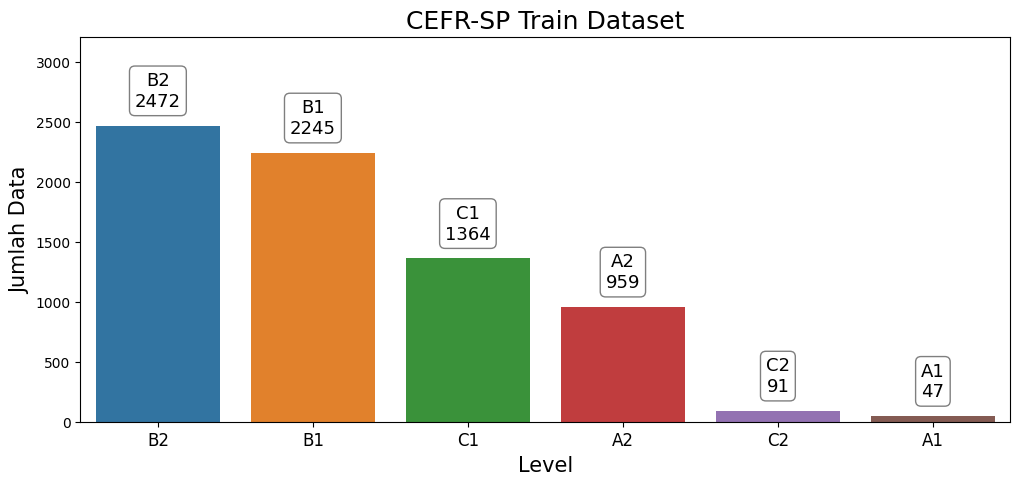

In [180]:
# Visualize CEFR-SP train dataset
vis_data(df_cefr_sp_train, "CEFR-SP Train Dataset")

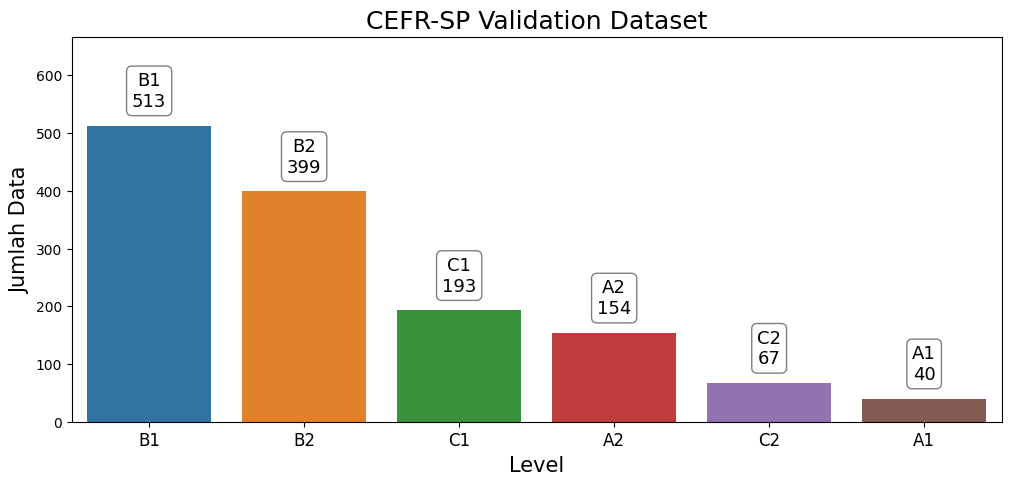

In [181]:
# Visualize CEFR-SP validation dataset
vis_data(df_cefr_sp_val, "CEFR-SP Validation Dataset")

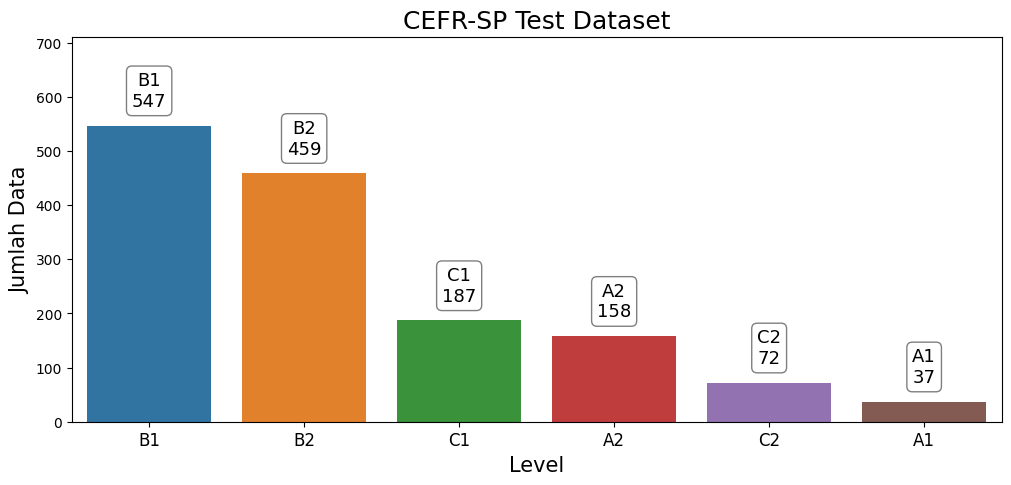

In [182]:
# Visualize CEFR-SP test dataset
vis_data(df_cefr_sp_test, "CEFR-SP Test Dataset")

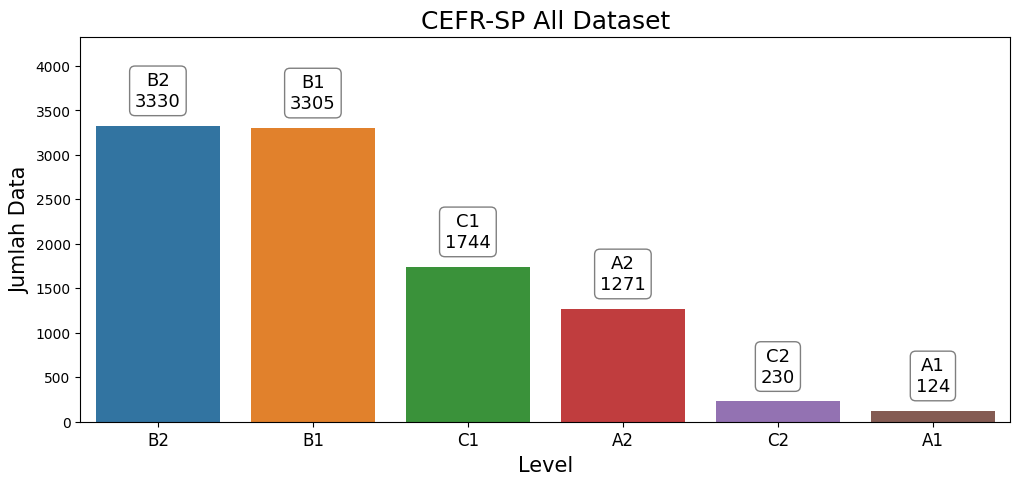

In [183]:
# Visualize CEFR-SP all dataset
vis_data(df_cefr_sp_all, "CEFR-SP All Dataset")

#### Kaggle 🟢

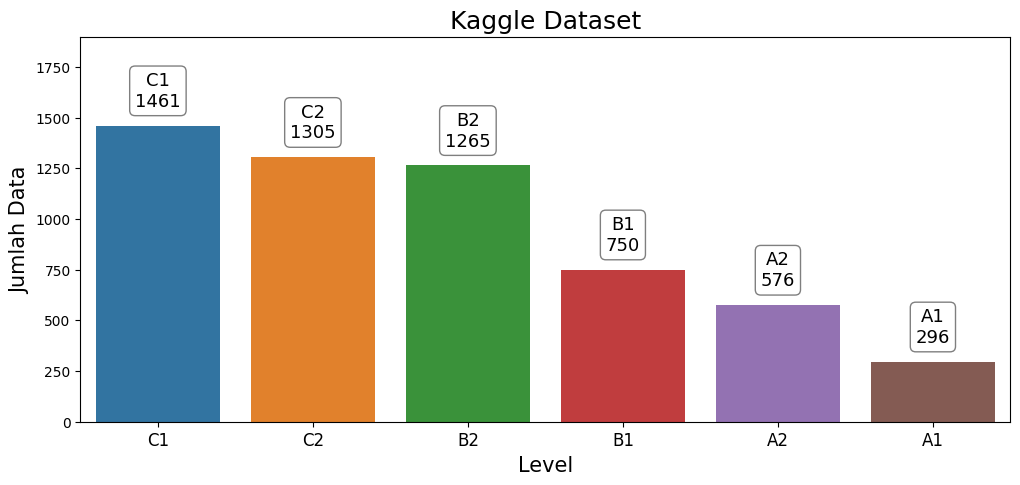

In [184]:
# Visualize Kaggle dataset
vis_data(df_kaggle, "Kaggle Dataset")

#### CERD 🟢

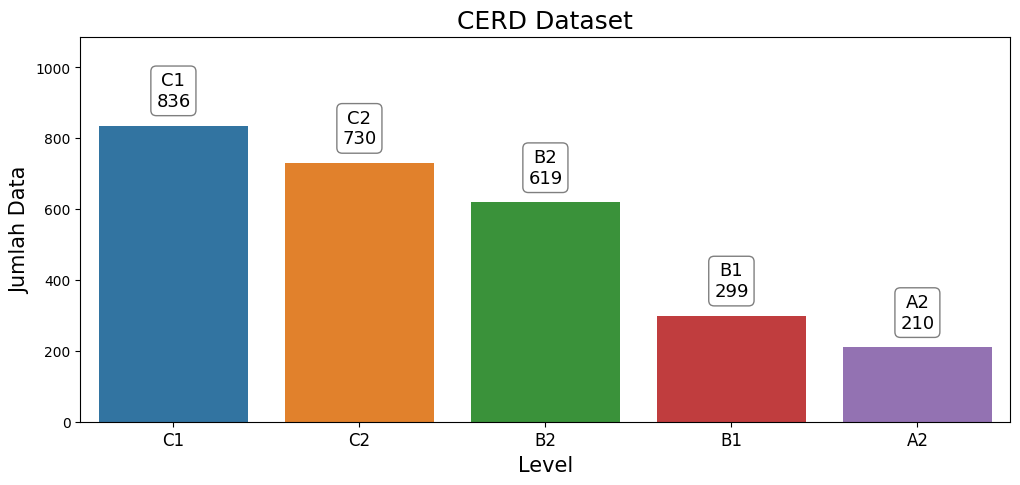

In [185]:
# Visualize CERD dataset
vis_data(df_cerd, "CERD Dataset")

#### Hugging Face 🟢

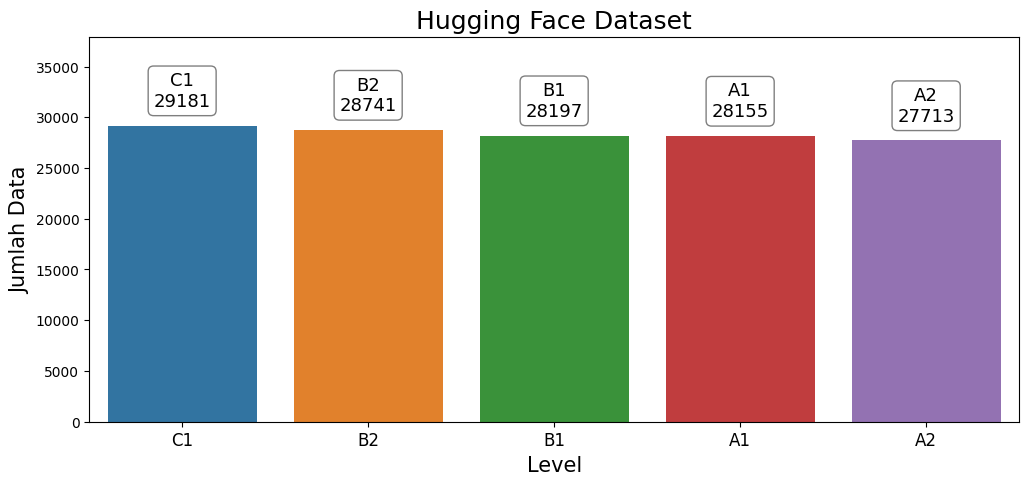

In [186]:
# Visualize Hugging Face dataset
vis_data(df_hugging_face, "Hugging Face Dataset")

#### All 🟢

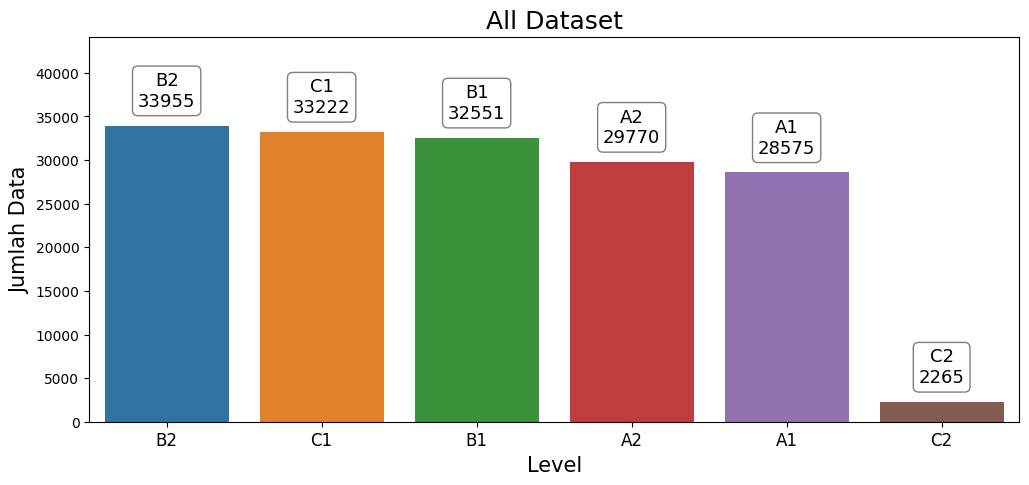

In [187]:
# Visualize all dataset
vis_data(df_all, "All Dataset")

## Dataset information ✅

### CEFR-SP 🟢

In [188]:
# Display CEFR-SP train dataset
df_cefr_sp_train.head()

Text Level  A1  A2  B1  B2  C1  \
0                               Is that your bike     A1   1   0   0   0   0   
1  She had a beautiful necklace around her neck .     A1   1   0   0   0   0   
2                 I forgot to bring my umbrella .     A1   1   0   0   0   0   
3                          The baby kept crying .     A1   1   0   0   0   0   
4     Do you know what you 're doing this weekend     A1   1   0   0   0   0   

   C2              Labels  Text Count  
0   0  [1, 0, 0, 0, 0, 0]           4  
1   0  [1, 0, 0, 0, 0, 0]           9  
2   0  [1, 0, 0, 0, 0, 0]           7  
3   0  [1, 0, 0, 0, 0, 0]           5  
4   0  [1, 0, 0, 0, 0, 0]           9

In [189]:
# Display CEFR-SP train dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7178 entries, 0 to 7177
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7178 non-null   object
 1   Level       7178 non-null   object
 2   A1          7178 non-null   uint8 
 3   A2          7178 non-null   uint8 
 4   B1          7178 non-null   uint8 
 5   B2          7178 non-null   uint8 
 6   C1          7178 non-null   uint8 
 7   C2          7178 non-null   uint8 
 8   Labels      7178 non-null   object
 9   Text Count  7178 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 322.4+ KB


In [190]:
# Check isnull in CEFR-SP train dataset
df_cefr_sp_train.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [191]:
# Display CEFR-SP validation dataset
df_cefr_sp_val.head()

Text Level  A1  A2  B1  B2  C1  C2  \
0      Do you need something to eat     A1   1   0   0   0   0   0   
1       I have two fish in a bowl .     A1   1   0   0   0   0   0   
2        She wanted the grey coat .     A1   1   0   0   0   0   0   
3  I sent my girlfriend red roses .     A1   1   0   0   0   0   0   
4     She needs to use your phone .     A1   1   0   0   0   0   0   

               Labels  Text Count  
0  [1, 0, 0, 0, 0, 0]           6  
1  [1, 0, 0, 0, 0, 0]           8  
2  [1, 0, 0, 0, 0, 0]           6  
3  [1, 0, 0, 0, 0, 0]           7  
4  [1, 0, 0, 0, 0, 0]           7

In [192]:
# Display CEFR-SP validation dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1366 non-null   object
 1   Level       1366 non-null   object
 2   A1          1366 non-null   uint8 
 3   A2          1366 non-null   uint8 
 4   B1          1366 non-null   uint8 
 5   B2          1366 non-null   uint8 
 6   C1          1366 non-null   uint8 
 7   C2          1366 non-null   uint8 
 8   Labels      1366 non-null   object
 9   Text Count  1366 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 61.4+ KB


In [193]:
# Check isnull in CEFR-SP validation dataset
df_cefr_sp_val.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [194]:
# Display CEFR-SP test dataset
df_cefr_sp_test.head()

Text Level  A1  A2  B1  B2  C1  C2  \
0                I bought both of them .     A1   1   0   0   0   0   0   
1                     Can you speak Thai     A1   1   0   0   0   0   0   
2  That dog running in circles is mine .     A1   1   0   0   0   0   0   
3              Please give me the time .     A1   1   0   0   0   0   0   
4                 These seats are ours .     A1   1   0   0   0   0   0   

               Labels  Text Count  
0  [1, 0, 0, 0, 0, 0]           6  
1  [1, 0, 0, 0, 0, 0]           4  
2  [1, 0, 0, 0, 0, 0]           8  
3  [1, 0, 0, 0, 0, 0]           6  
4  [1, 0, 0, 0, 0, 0]           5

In [195]:
# Display CEFR-SP test dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1460 non-null   object
 1   Level       1460 non-null   object
 2   A1          1460 non-null   uint8 
 3   A2          1460 non-null   uint8 
 4   B1          1460 non-null   uint8 
 5   B2          1460 non-null   uint8 
 6   C1          1460 non-null   uint8 
 7   C2          1460 non-null   uint8 
 8   Labels      1460 non-null   object
 9   Text Count  1460 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 65.6+ KB


In [196]:
# Check isnull in CEFR-SP test dataset
df_cefr_sp_test.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [197]:
# Display CEFR-SP all dataset
df_cefr_sp_all.head()

Text Level  A1  A2  B1  B2  C1  \
0                               Is that your bike     A1   1   0   0   0   0   
1  She had a beautiful necklace around her neck .     A1   1   0   0   0   0   
2                 I forgot to bring my umbrella .     A1   1   0   0   0   0   
3                          The baby kept crying .     A1   1   0   0   0   0   
4     Do you know what you 're doing this weekend     A1   1   0   0   0   0   

   C2              Labels  Text Count  
0   0  [1, 0, 0, 0, 0, 0]           4  
1   0  [1, 0, 0, 0, 0, 0]           9  
2   0  [1, 0, 0, 0, 0, 0]           7  
3   0  [1, 0, 0, 0, 0, 0]           5  
4   0  [1, 0, 0, 0, 0, 0]           9

In [198]:
# Display CEFR-SP all information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 10003
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        10004 non-null  object
 1   Level       10004 non-null  object
 2   A1          10004 non-null  uint8 
 3   A2          10004 non-null  uint8 
 4   B1          10004 non-null  uint8 
 5   B2          10004 non-null  uint8 
 6   C1          10004 non-null  uint8 
 7   C2          10004 non-null  uint8 
 8   Labels      10004 non-null  object
 9   Text Count  10004 non-null  int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 449.4+ KB


In [199]:
# Check isnull in CEFR-SP all dataset
df_cefr_sp_all.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

### Kaggle 🟢

In [200]:
# Display Kaggle dataset
df_kaggle.head()

Text  \
0  Hi I've been meaning to write for ages and finally today I'm actually doing something about it.  Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much.  Since we last saw each other I've unpacked my bags in four different cities.  This job has turned out to be more of a whirlwind than I expected, but it's all goodI went from London to Prague to set up a new regional office there.  You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that.  Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening.  But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home   
1                                                                                                             It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone.  From there I was on another three-month mission to oversee the set-up of the office in New York.  Loved, loved, loved New York It's like being in one big TV show, as everywhere looks just a little bit familiar.  I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out.  It was really hard to leave for the next job, especially as I kind of met someone  More about Michael laterSo then I was posted to LA, which felt like a whole other country compared with the East Coast   
2                                                                                                                                                                                                                    I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend.  He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often.  Those three months flew by and then I was off again, to Frankfurt, which is where I am now.  And … so is Michael He got a month off work and we're trying to work out how we can be in the same place at the same time for a while   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                            We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there The wedding's going to be at home in London in September and I hope you can come Anyway, tell me all your news and I promise not to leave it so long this time Lots of love, Kath   
4    It was not so much how hard people found the challenge but how far they would go to avoid it that left researchers gobsmacked.  The task To sit in a chair and do nothing but think. So unbearable did some find it that they took up the safe but alarming opportunity to give themselves mild electric shocks in an attempt to break the tedium. Two-thirds of men pressed a button to deliver a painful jolt during a 15-minute spell of solitude. Under the same conditions, a quarter of women pressed the shock button.  The difference, scientists suspect, is that men tend to be more sensation-seeking than women. The report from psychologists at Virginia and Harvard Universities is one of a surprising few to tackle the question of why most of us find it so hard to do nothing   

  Level  A1  A2  B1  B2  C1  C2              Labels  Text Count  
0    B2   0   0   0   1   0   0  [0

In [201]:
# Display Kaggle dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5653 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        5653 non-null   object
 1   Level       5653 non-null   object
 2   A1          5653 non-null   uint8 
 3   A2          5653 non-null   uint8 
 4   B1          5653 non-null   uint8 
 5   B2          5653 non-null   uint8 
 6   C1          5653 non-null   uint8 
 7   C2          5653 non-null   uint8 
 8   Labels      5653 non-null   object
 9   Text Count  5653 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 253.9+ KB


In [202]:
# Check isnull in Kaggle dataset
df_kaggle.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

### CERD 🟢

In [203]:
# Display CERD dataset
df_cerd.head()

Text  \
0                                                                                                                                                                                                                                                                               Many of us listen to the radio when we get up in the morning and most of us also require some external means to persuade us to get out of bed.  Thus we have the clock radio.  But how do you pick a good one Our panel, which consisted of myself plus the inventor Tom Granger and the broadcaster Paul Bridges, tested five currently available.    
1                                                                                                                                                                                                                                                           The 'dual alarm function' that is advertised with this model does not allow you, as I first supposed, to be woken by the buzzer, snooze a while and then finally be driven out of bed.  The instruction booklet advises you to use this function to set two different wake-up times, one for work days and one for weekends, but whose life is programmed to this extent   
2                                          Since this model costs more or less the same as the second model tested, the inclusion of a cassette player is quite a bargain - you can fall asleep to your own soothing tapes and wake up to a day without news.  We all thought the quality of the radio excellent, too - if only the whole thing was smaller.  It's as big as a rugby ball.  Paul Bridges said, 'Any clock radio I buy has to leave enough space on the bedside table for my keys, wallet, glasses and telephone.  Anyway, I'm completely paranoid and always book a wake-up call in case the alarm doesn't go off. '   
3  This model was voted best in the beauty stakes and overall winner.  Paul Bridges declared himself 'in love with it', although the clock on the one he tested 'kept getting stuck at 16. 00'.  I was fascinated by the digital display, with its classy grey numbers on a gentle green background.  The wide snooze bar means you can tap it on the edge with your eyes shut.  Unfortunately, the smooth undulations and tactile buttons, like pebbles on the beach, encouraged me to run my fingers over them as if they were keys on a piano, which proved my undoing when I finally looked at the SO-page instruction booklet.    
4                                                                                                                                                                                                                                                                                            The clock has a self-power back-up so you don't have to reset it if someone unceremoniously pulls the plug out in order to use a hairdryer or the vacuum cleaner; this met with unanimous approval.  However, we all found it a technical feat to set up - though completing the learning curve made us feel 'cool' and sophisticated.    

  Level  A1  A2  B1  B2  C1  C2              Labels  Text Count  
0    C1   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]          65  
1    C1   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]          66  
2    C1   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]         109  
3    C1   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]         108  
4    C1   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]          58

In [204]:
# Display CERD dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 2694
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        2694 non-null   object
 1   Level       2694 non-null   object
 2   A1          2694 non-null   int64 
 3   A2          2694 non-null   uint8 
 4   B1          2694 non-null   uint8 
 5   B2          2694 non-null   uint8 
 6   C1          2694 non-null   uint8 
 7   C2          2694 non-null   uint8 
 8   Labels      2694 non-null   object
 9   Text Count  2694 non-null   int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 139.4+ KB


In [205]:
# Check isnull in CERD dataset
df_cerd.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

### Hugging Face 🟢

In [206]:
# Display Hugging Face dataset
df_hugging_face.head()

Text  \
0                                    From the beginning, with only a few minor lapses, the High King of Narnia did what was right because he saw it was right.    
1                                                                                     Millington, however, was a recalcitrant 'sex worker' who never recanted.    
2  It does not, like most systems of teaching, try to make us deal with sectors of the personality that we personally experience as syntonic to our wellbeing.    
3                                                                                                                   Jessica tilted her head toward the window.    
4                                                                                                       Psychoanalysis was both repressive and antirepressive.    

  Level  C2  A1  A2  B1  B2  C1              Labels  Text Count  
0    B2   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]          24  
1    B2   0   0   0   0   1   0  [0, 0, 0, 0, 1, 0]          10  
2    C1   0   0   0   0   0   1  [0, 0, 0, 0, 0, 1]          27  
3    A2   0   0   1   0   0   0  [0, 0, 1, 0, 0, 0]           7  
4    A2   0   0   1   0   0   0  [0, 0, 1, 0, 0, 0]           6

In [207]:
# Display Hugging Face dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141987 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        141987 non-null  object
 1   Level       141987 non-null  object
 2   C2          141987 non-null  int64 
 3   A1          141987 non-null  uint8 
 4   A2          141987 non-null  uint8 
 5   B1          141987 non-null  uint8 
 6   B2          141987 non-null  uint8 
 7   C1          141987 non-null  uint8 
 8   Labels      141987 non-null  object
 9   Text Count  141987 non-null  int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 7.2+ MB


In [208]:
# Check isnull in Hugging Face dataset
df_hugging_face.isnull().any()

Text          False
Level         False
C2            False
A1            False
A2            False
B1            False
B2            False
C1            False
Labels        False
Text Count    False
dtype: bool

### All 🟢

In [209]:
# Display all dataset
df_all.head()

Text Level  A1  A2  B1  B2  C1  \
0                               Is that your bike     A1   1   0   0   0   0   
1  She had a beautiful necklace around her neck .     A1   1   0   0   0   0   
2                 I forgot to bring my umbrella .     A1   1   0   0   0   0   
3                          The baby kept crying .     A1   1   0   0   0   0   
4     Do you know what you 're doing this weekend     A1   1   0   0   0   0   

   C2              Labels  Text Count  
0   0  [1, 0, 0, 0, 0, 0]           4  
1   0  [1, 0, 0, 0, 0, 0]           9  
2   0  [1, 0, 0, 0, 0, 0]           7  
3   0  [1, 0, 0, 0, 0, 0]           5  
4   0  [1, 0, 0, 0, 0, 0]           9

In [210]:
# Display all dataset information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160338 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        160338 non-null  object
 1   Level       160338 non-null  object
 2   A1          160338 non-null  int64 
 3   A2          160338 non-null  uint8 
 4   B1          160338 non-null  uint8 
 5   B2          160338 non-null  uint8 
 6   C1          160338 non-null  uint8 
 7   C2          160338 non-null  int64 
 8   Labels      160338 non-null  object
 9   Text Count  160338 non-null  int64 
dtypes: int64(3), object(3), uint8(4)
memory usage: 9.2+ MB


In [211]:
# Check isnull in all dataset
df_all.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

## Save pre-processing dataset ✅

### Initialize CSV file name 🟢

#### CEFR-SP 🟢

In [212]:
# Define name file for CEFR-SP
csv_name_df_cefr_sp_train = "cefr_sp_train.csv"
csv_name_df_cefr_sp_val = "cefr_sp_val.csv"
csv_name_df_cefr_sp_test = "cefr_sp_test.csv"
csv_name_df_cefr_sp_all = "cefr_sp_all.csv"

#### Kaggle 🟢

In [213]:
# Define name file for Kaggle
csv_name_df_kaggle = "kaggle.csv"

#### CERD 🟢

In [214]:
# Define name file for CERD
csv_name_df_cerd = "cerd.csv"

#### Hugging Face 🟢

In [215]:
# Define name file for Hugging Face
csv_name_df_hugging_face = "hugging_face.csv"

#### All 🟢

In [216]:
# Define name file for All
csv_name_df_all = "all.csv"

### Save to CSV 🟢

#### CEFR-SP 🟢

In [217]:
# Save CEFR-SP train dataset
df_cefr_sp_train.to_csv(csv_name_df_cefr_sp_train, index=False)

In [218]:
# Save CEFR-SP validation dataset
df_cefr_sp_val.to_csv(csv_name_df_cefr_sp_val, index=False)

In [219]:
# Save CEFR-SP test dataset
df_cefr_sp_test.to_csv(csv_name_df_cefr_sp_test, index=False)

In [220]:
# Save CEFR-SP all dataset
df_cefr_sp_all.to_csv(csv_name_df_cefr_sp_all, index=False)

#### Kaggle 🟢

In [221]:
# Save Kaggle dataset
df_kaggle.to_csv(csv_name_df_kaggle, index=False)

#### CERD 🟢

In [222]:
# Save CERD dataset
df_cerd.to_csv(csv_name_df_cerd, index=False)

#### Hugging Face 🟢

In [223]:
# Save Hugging Face dataset
df_hugging_face.to_csv(csv_name_df_hugging_face, index=False)

#### All 🟢

In [224]:
# Save All dataset
df_all.to_csv(csv_name_df_all, index=False)

### Zip CSV file 🟢

#### Make directory 🟢

In [225]:
# Make csv dataset dir
!mkdir CSV

#### CEFR-SP 🟢

In [226]:
# Copy CEFR-SP CSV dataset to csv dir
!cp -r "/content/cefr_sp_train.csv" "/content/CSV"
!cp -r "/content/cefr_sp_val.csv" "/content/CSV"
!cp -r "/content/cefr_sp_test.csv" "/content/CSV"
!cp -r "/content/cefr_sp_all.csv" "/content/CSV"

#### Kaggle 🟢

In [227]:
# Copy Kaggle CSV dataset to csv dir
!cp -r "/content/kaggle.csv" "/content/CSV"

#### CERD 🟢

In [228]:
# Copy CERD CSV dataset to csv dir
!cp -r "/content/cerd.csv" "/content/CSV"

#### Hugging Face 🟢

In [229]:
# Copy Hugging Face CSV dataset to csv dir
!cp -r "/content/hugging_face.csv" "/content/CSV"

#### All 🟢

In [230]:
# Copy All CSV dataset to csv dir
!cp -r "/content/all.csv" "/content/CSV"

#### Zip directory 🟢

In [231]:
# Zip file
!zip -r "CSV.zip" /content/CSV

  adding: content/CSV/ (stored 0%)
  adding: content/CSV/cefr_sp_all.csv (deflated 73%)
  adding: content/CSV/cerd.csv (deflated 64%)
  adding: content/CSV/cefr_sp_train.csv (deflated 74%)
  adding: content/CSV/cefr_sp_val.csv (deflated 71%)
  adding: content/CSV/hugging_face.csv (deflated 67%)
  adding: content/CSV/cefr_sp_test.csv (deflated 70%)
  adding: content/CSV/kaggle.csv (deflated 63%)
  adding: content/CSV/all.csv (deflated 67%)


### Save CSV to drive 🟢

In [252]:
# Copy CSV dataset folder to drive
!cp -r "/content/CSV" "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset"

In [253]:
# Copy CSV dataset zip to drive
!cp -r "/content/CSV.zip" "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset"

### Zip PNG file 🟢

#### Make directory 🟢

In [251]:
# Make png dataset dir
!mkdir PNG

#### Word Clouds 🟢

In [254]:
# Copy Word Cloud PNG to png dir
!cp -r "/content/A1 Word Cloud.png" "/content/PNG"
!cp -r "/content/A2 Word Cloud.png" "/content/PNG"
!cp -r "/content/B1 Word Cloud.png" "/content/PNG"
!cp -r "/content/B2 Word Cloud.png" "/content/PNG"
!cp -r "/content/C1 Word Cloud.png" "/content/PNG"
!cp -r "/content/C2 Word Cloud.png" "/content/PNG"

#### Boxplot 🟢

In [255]:
# Copy Boxplot PNG to png dir
!cp -r "/content/Boxplot dataset.png" "/content/PNG"

#### Words Count 🟢

In [257]:
# Copy Words Count PNG to png dir
!cp -r "/content/All Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All A1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All A2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All B1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All B2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All C1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/All C2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face A1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face A2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face B1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face B2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Hugging Face C1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD A2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD B1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD B2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD C1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CERD C2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle A1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle A2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle B1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle B2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle C1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/Kaggle C2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP Train Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP Validation Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP Test Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP All Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all A1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all A2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all B1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all B2 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all C1 Dataset Words Count.png" "/content/PNG"
!cp -r "/content/CEFR-SP all C2 Dataset Words Count.png" "/content/PNG"

#### CEFR-SP 🟢

In [258]:
# Copy CEFR-SP PNG to png dir
!cp -r "/content/CEFR-SP Train Dataset.png" "/content/PNG"
!cp -r "/content/CEFR-SP Test Dataset.png" "/content/PNG"
!cp -r "/content/CEFR-SP Validation Dataset.png" "/content/PNG"
!cp -r "/content/CEFR-SP All Dataset.png" "/content/PNG"

#### Kaggle 🟢

In [259]:
# Copy Kaggle PNG to png dir
!cp -r "/content/Kaggle Dataset.png" "/content/PNG"

#### CERD 🟢

In [260]:
# Copy CERD PNG to png dir
!cp -r "/content/CERD Dataset.png" "/content/PNG"

#### Hugging Face 🟢

In [261]:
# Copy Hugging Face PNG to png dir
!cp -r "/content/Hugging Face Dataset.png" "/content/PNG"

#### All 🟢

In [262]:
# Copy All PNG to png dir
!cp -r "/content/All Dataset.png" "/content/PNG"

#### Zip directory 🟢

In [263]:
# Zip file
!zip -r "PNG.zip" /content/PNG

  adding: content/PNG/ (stored 0%)
  adding: content/PNG/Hugging Face A1 Dataset Words Count.png (deflated 25%)
  adding: content/PNG/CEFR-SP Validation Dataset.png (deflated 29%)
  adding: content/PNG/Kaggle Dataset.png (deflated 29%)
  adding: content/PNG/All Dataset Words Count.png (deflated 24%)
  adding: content/PNG/All C1 Dataset Words Count.png (deflated 23%)
  adding: content/PNG/CERD B1 Dataset Words Count.png (deflated 25%)
  adding: content/PNG/All A2 Dataset Words Count.png (deflated 24%)
  adding: content/PNG/All C2 Dataset Words Count.png (deflated 24%)
  adding: content/PNG/Kaggle B2 Dataset Words Count.png (deflated 24%)
  adding: content/PNG/Boxplot dataset.png (deflated 27%)
  adding: content/PNG/All B1 Dataset Words Count.png (deflated 24%)
  adding: content/PNG/CERD Dataset Words Count.png (deflated 24%)
  adding: content/PNG/CEFR-SP all B1 Dataset Words Count.png (deflated 30%)
  adding: content/PNG/Kaggle A2 Dataset Words Count.png (deflated 23%)
  adding: content

### Save PNG to drive 🟢

In [264]:
# Copy PNG zip to drive
!cp -r "/content/PNG.zip" "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset"

In [265]:
# Copy PNG folder to drive
!cp -r "/content/PNG" "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset"

### Save Dataset.zip to drive 🟢

In [266]:
# Copy Dataset zip to drive
!cp -r "/content/Dataset.zip" "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset"